# ML Exercise 1 - Taiwanese Bankrupcy

### Experiment design

1. Exploration:
    - Target Distribution
    - Missing Values distribution
    - Outliers
2. Preprocessing:
    - Split Train/Test (70-30)
    - Clean missing values
    - Remove outliers
    - Scaling
    - Encoding
    - PCA
3. Models:
    - KNN
    - RF
    - MLP
4. Hyperparameter optimization (Randomized Search CV)
    - Performance comparison
    - Holdout
    - Cross-validation
5. Metrics:
    - Accuracy
    - Precision
    - Sensitivity (for each class)
    - Specificity (for each class)
    - Recall
    - F1-Score

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Exploratory Data Analysis

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [6]:
df.shape

(6819, 96)

### 1.1. Target distribution  
In the entire data set we have a target distribution of:  
0 - 6599  
1 - 220  

Which means the data set is highly imbalanced, and we will have to evaluate model results properly with multiple metrics.

### 1.2. Missing values  
We have no missing values in this data set.

In [9]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [15]:
df.describe()

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# a lot of variables are correlated between each other, as well as with the target variable which 
# makes sense considering all of the attributes are hearth measures
# plt.figure(figsize=(24,12))
# sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [25]:
# remove leading and trailing whitespace in column names
df = df.rename(columns=lambda x: x.strip())

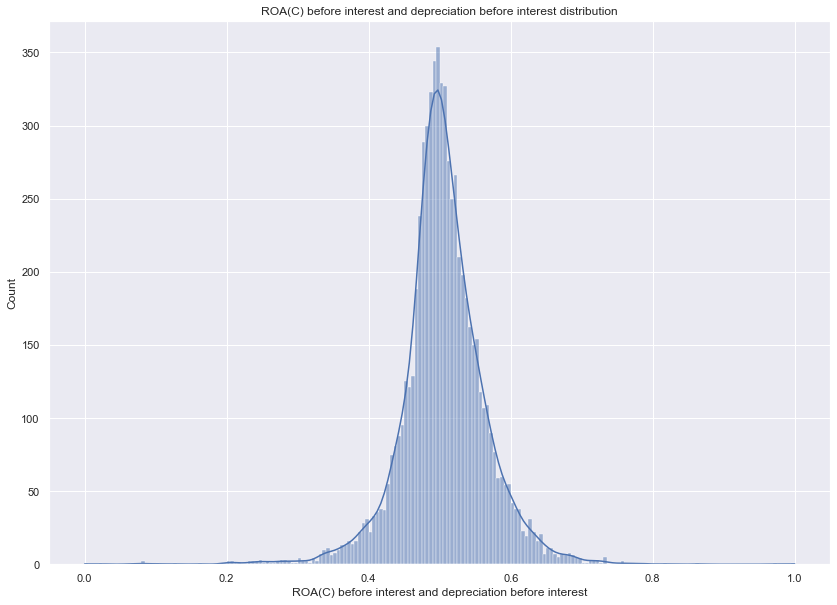

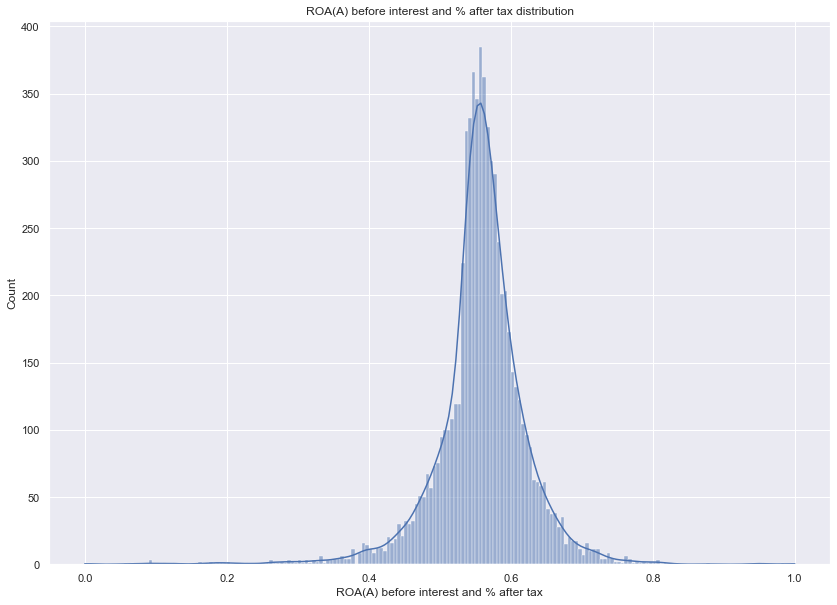

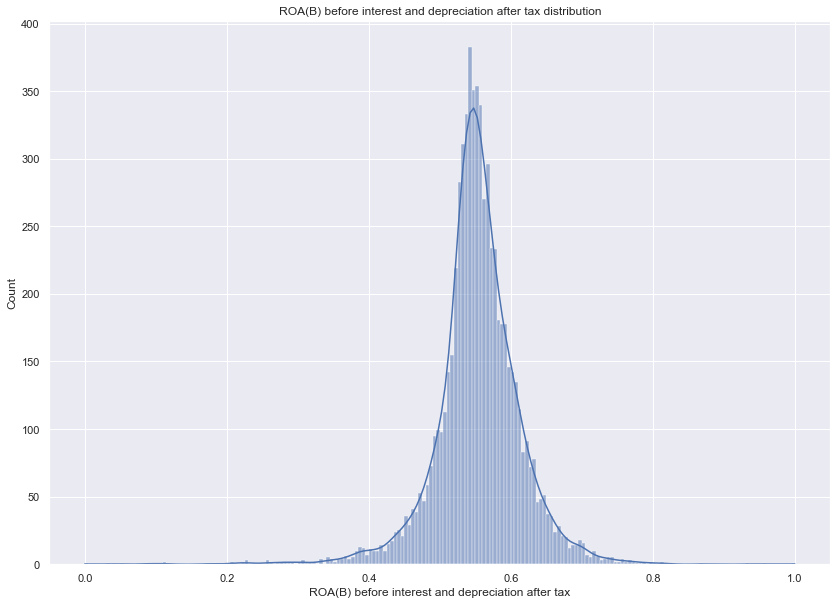

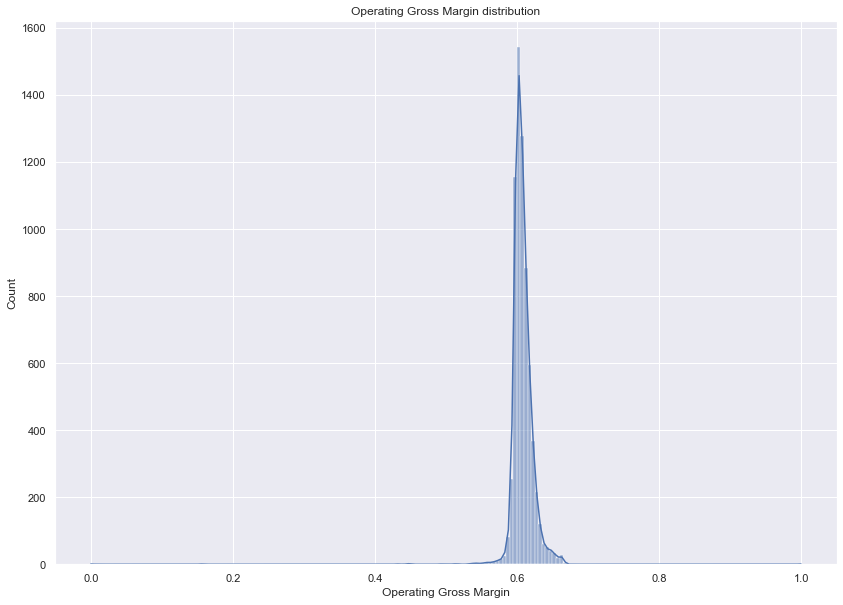

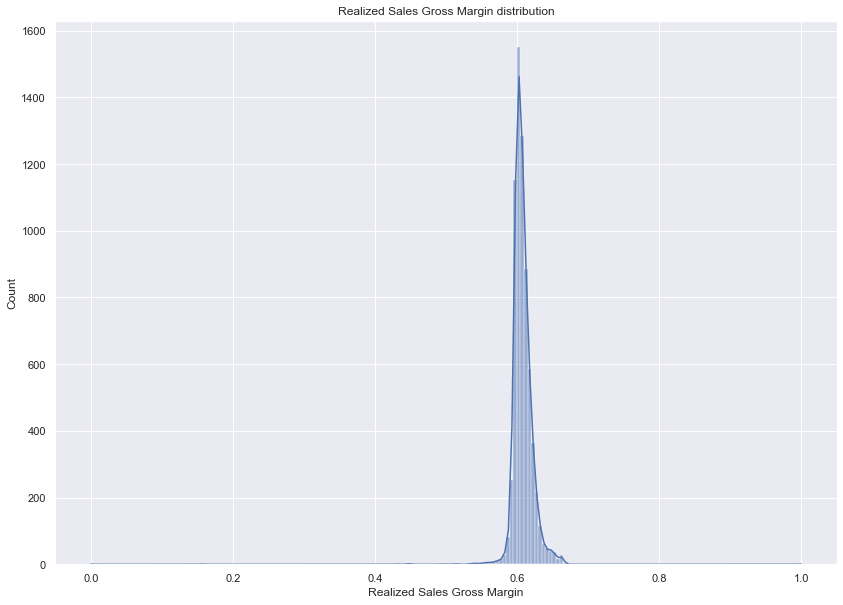

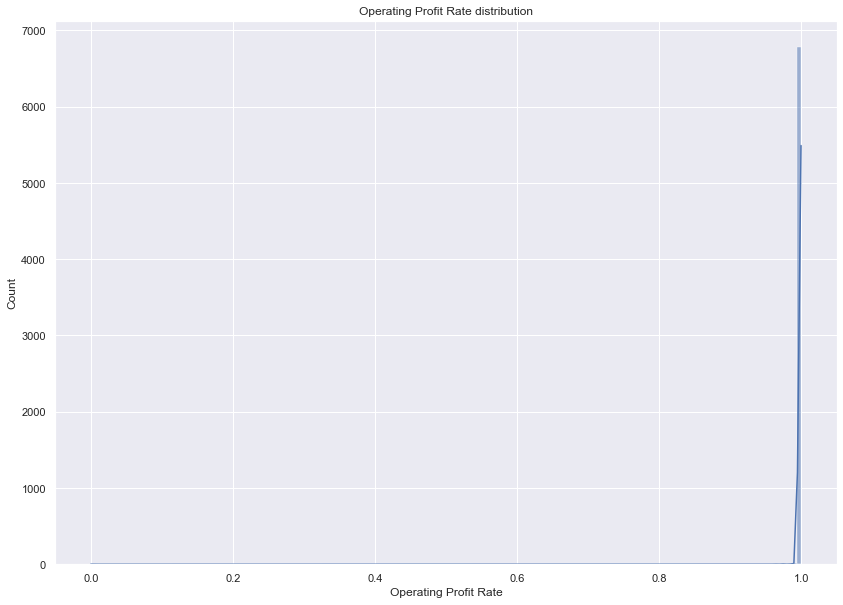

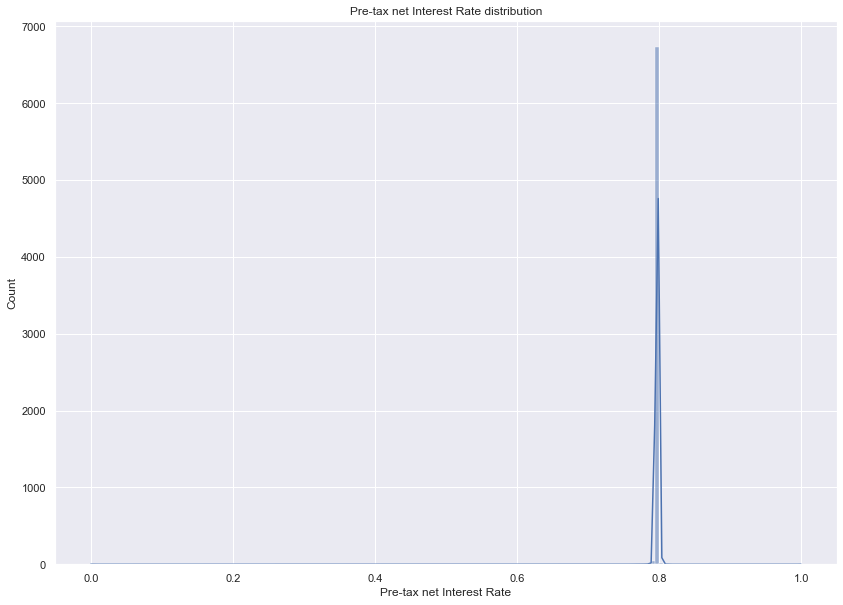

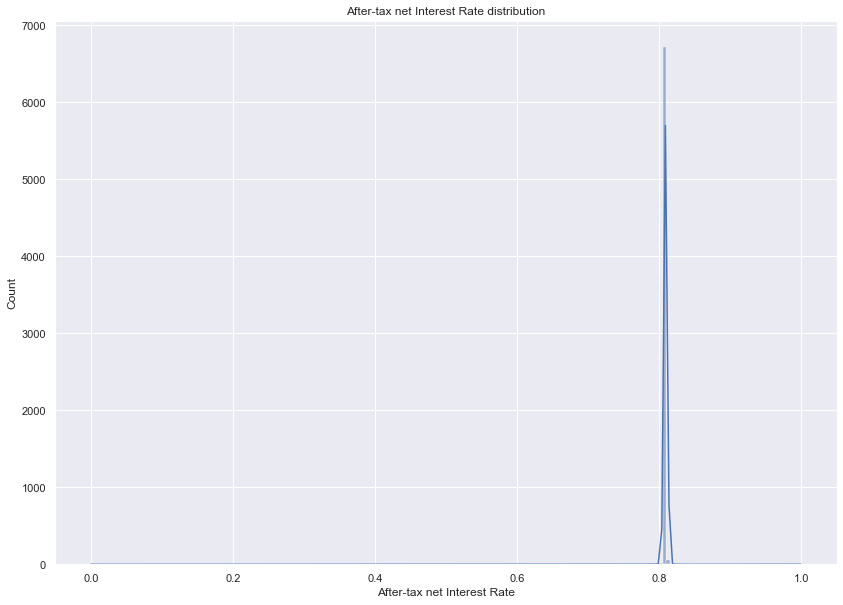

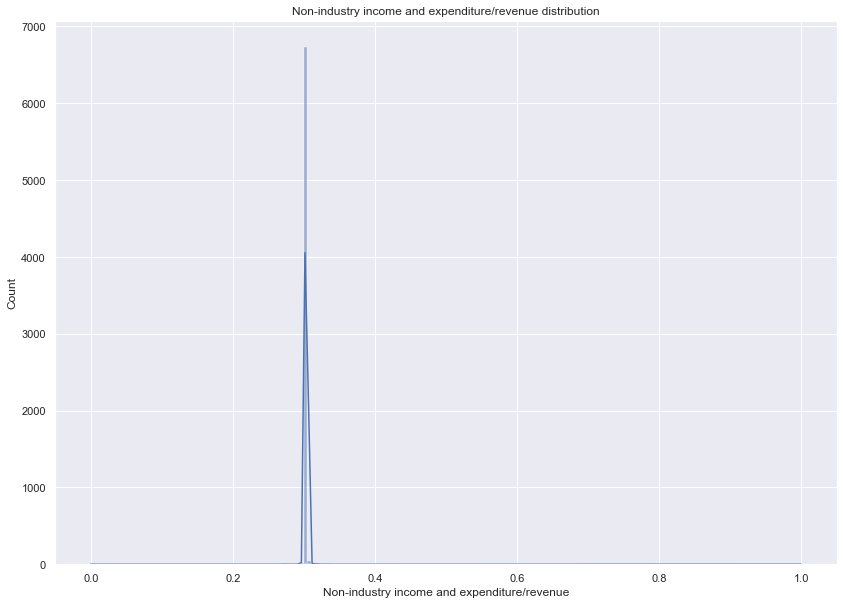

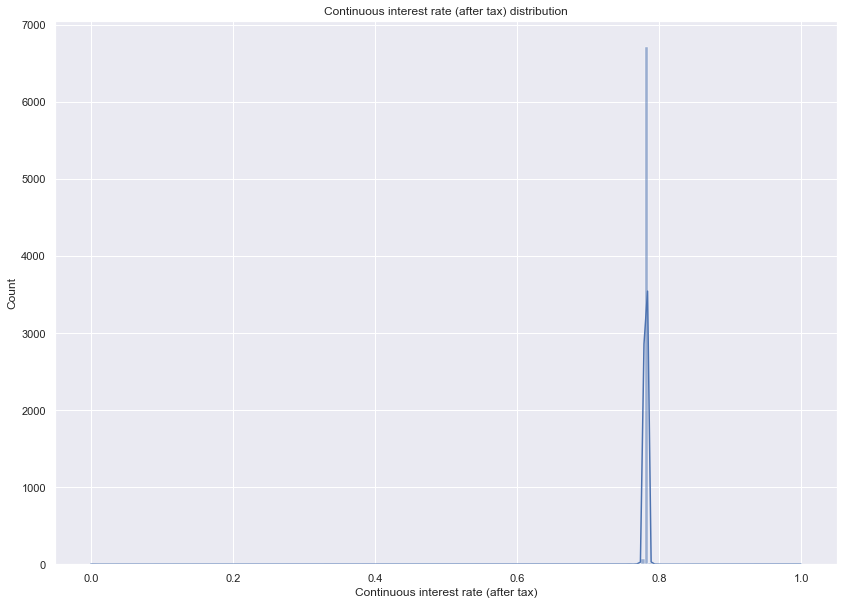

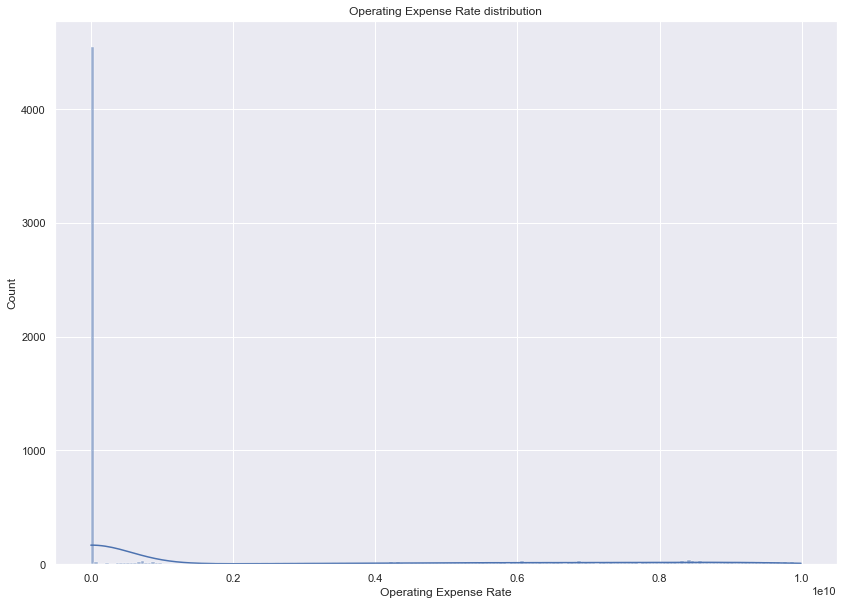

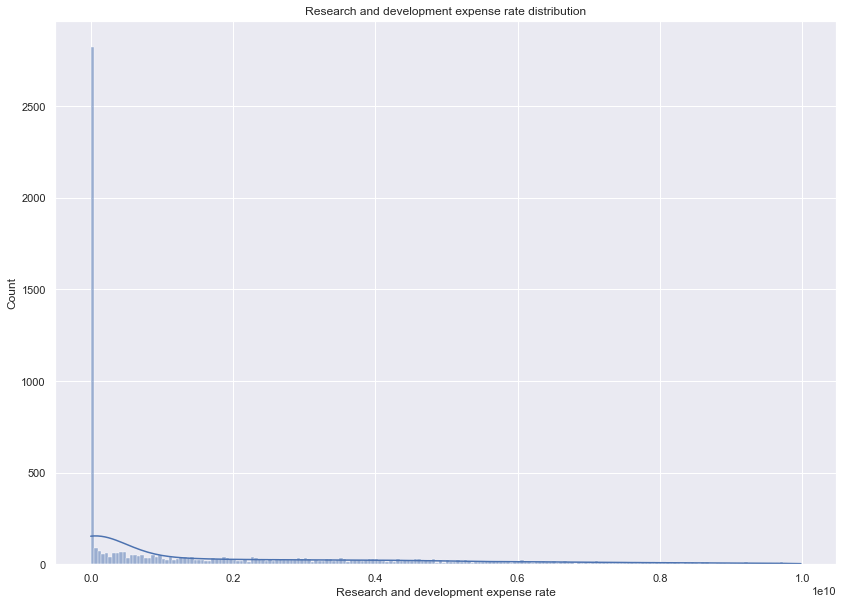

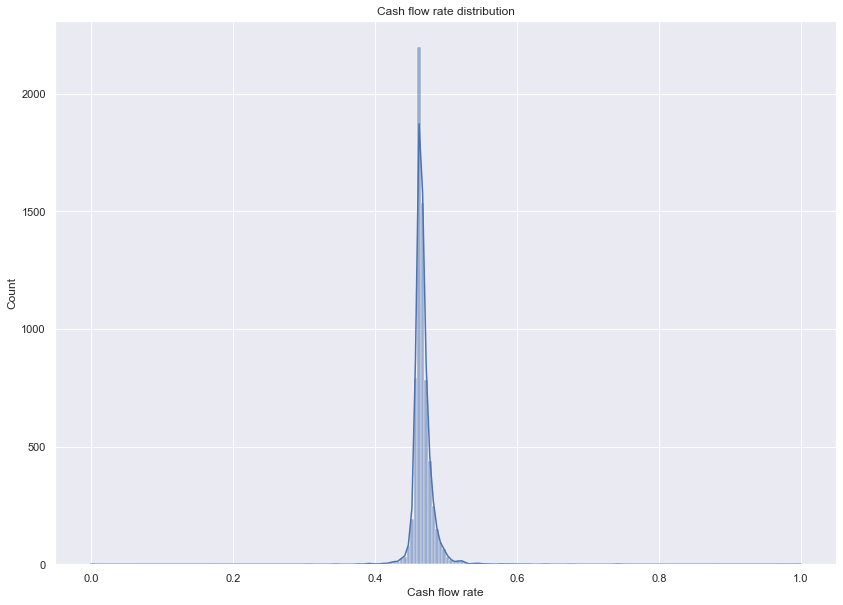

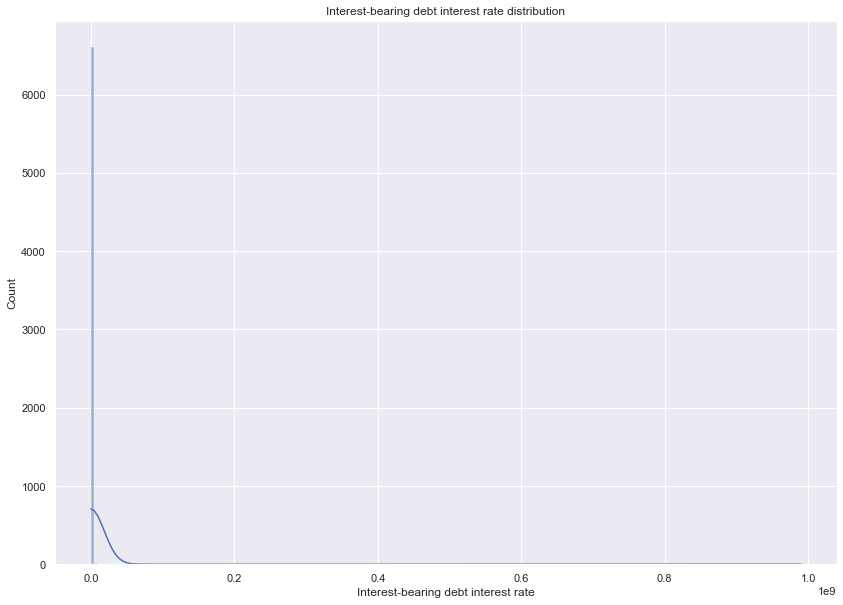

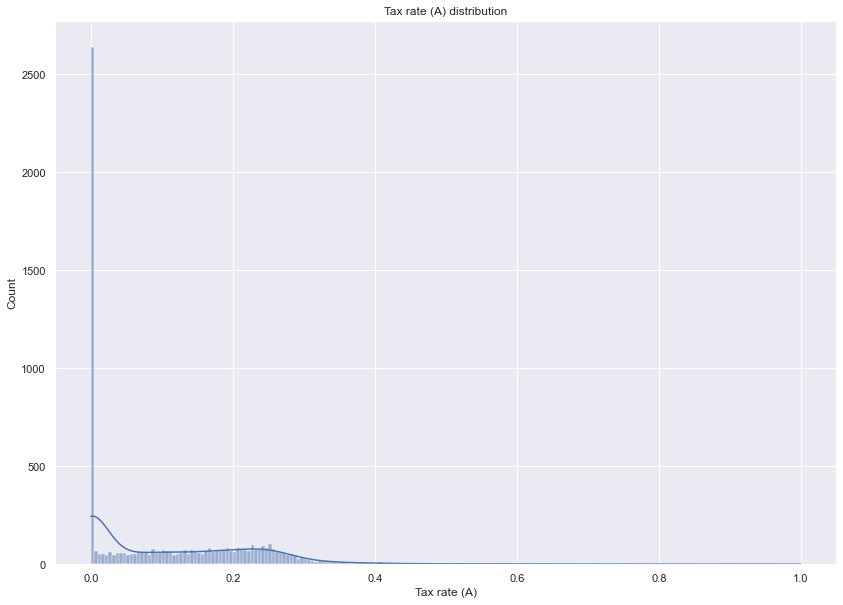

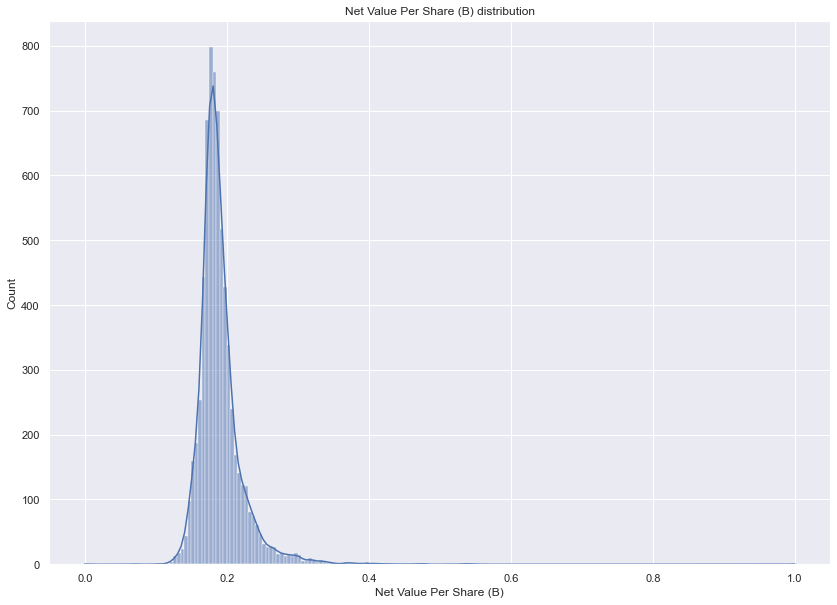

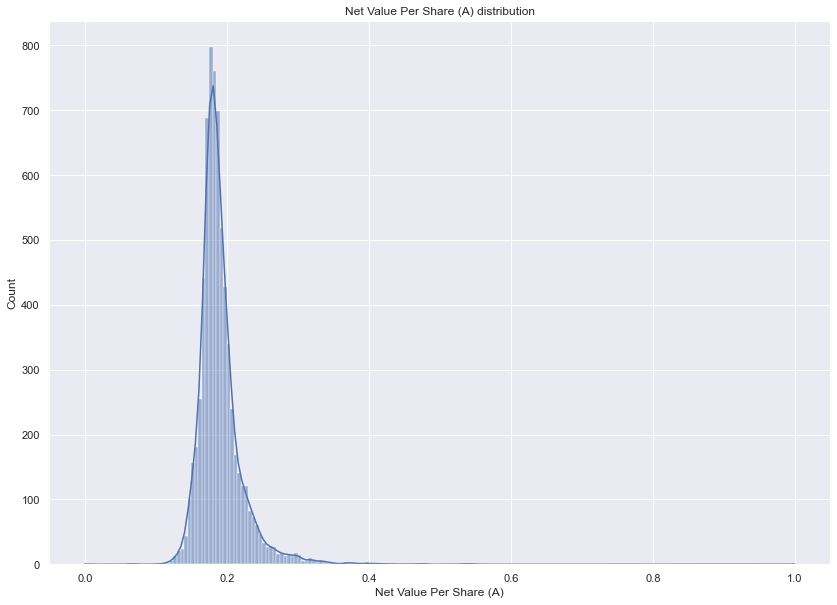

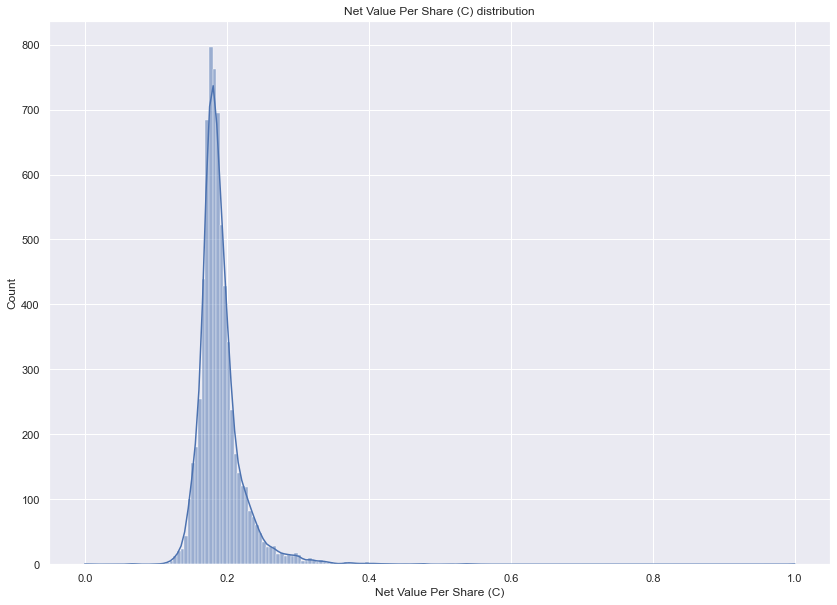

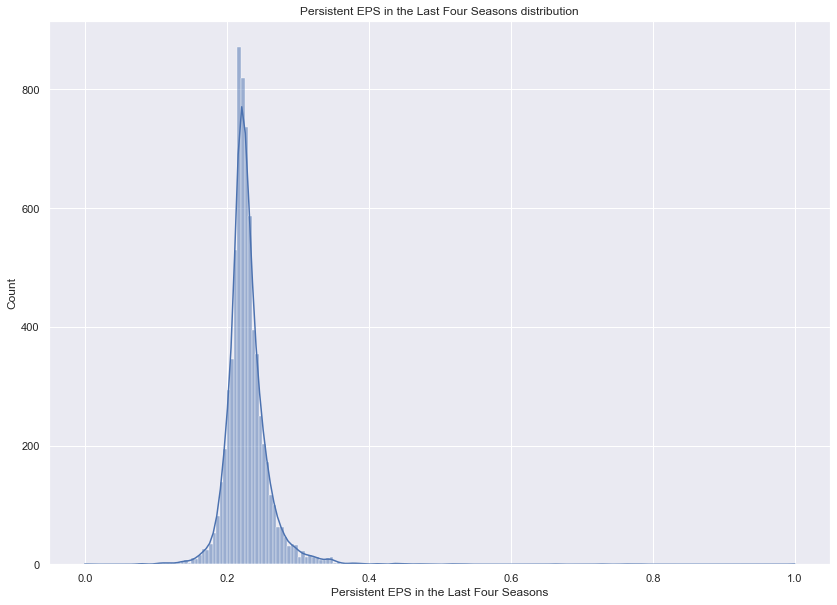

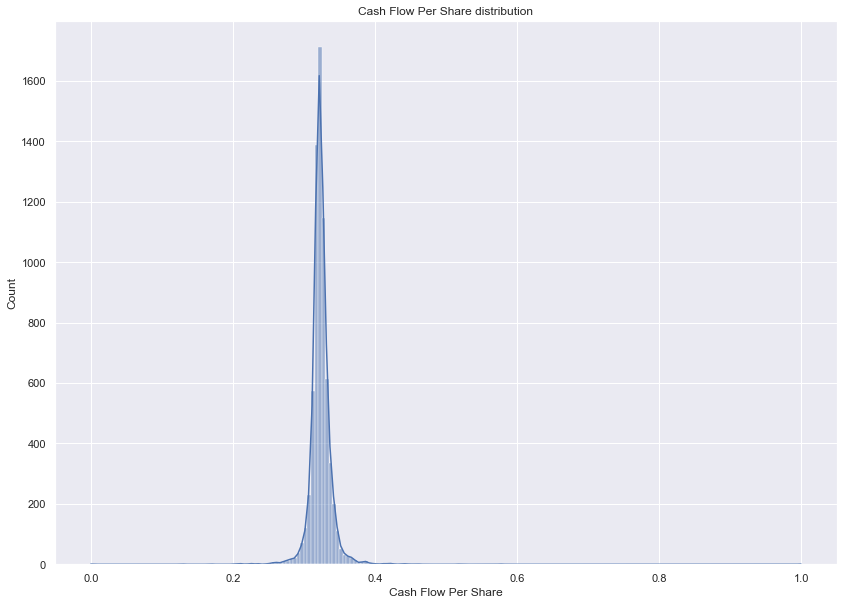

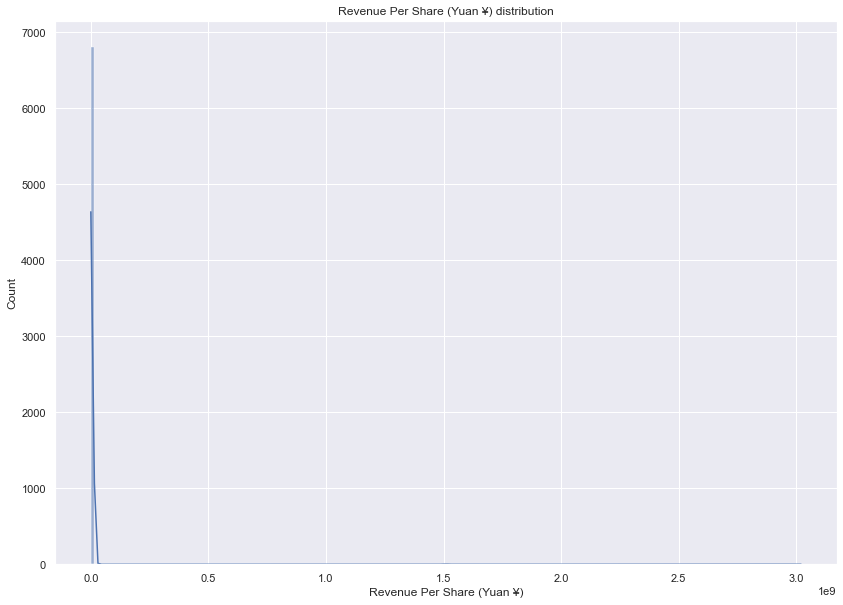

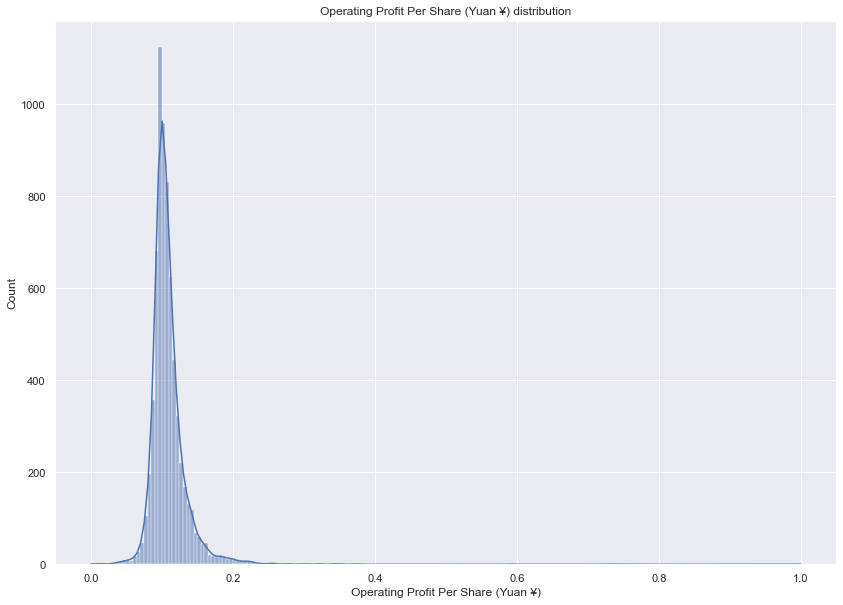

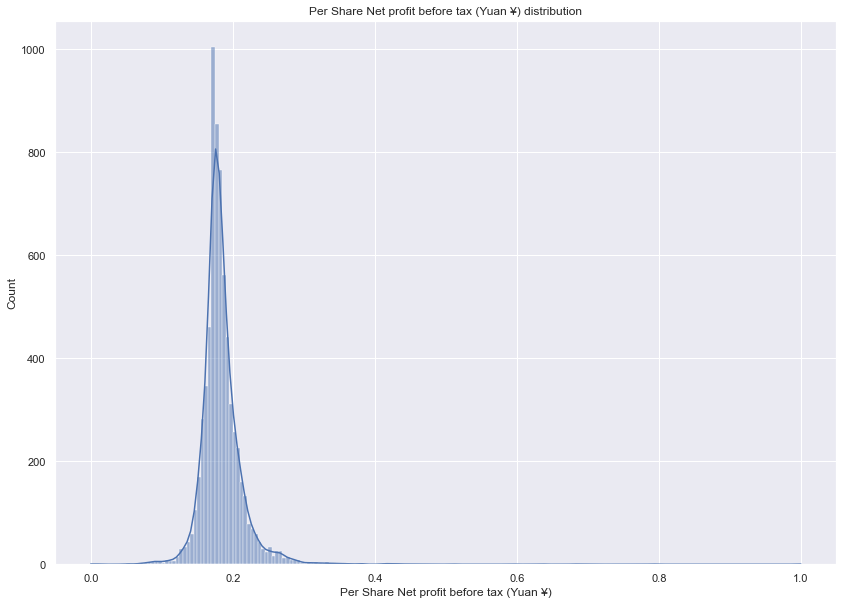

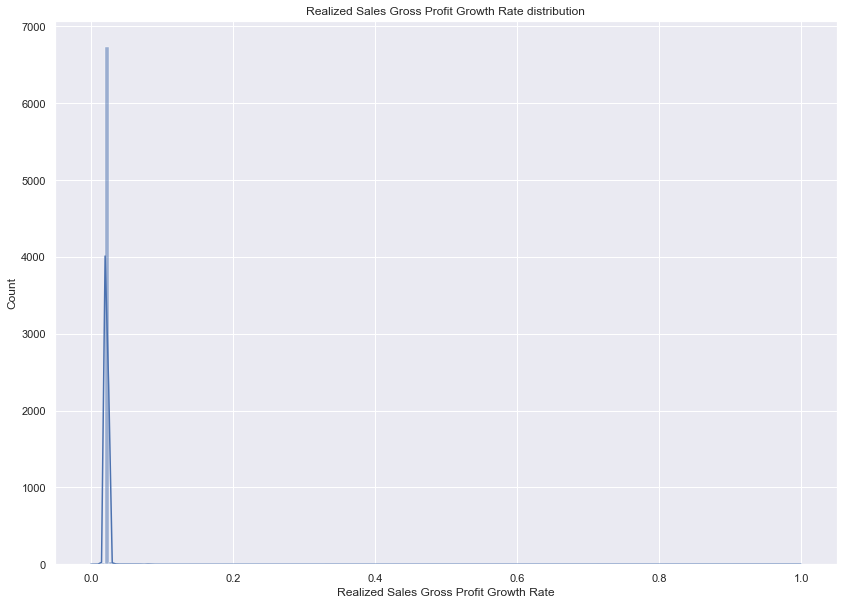

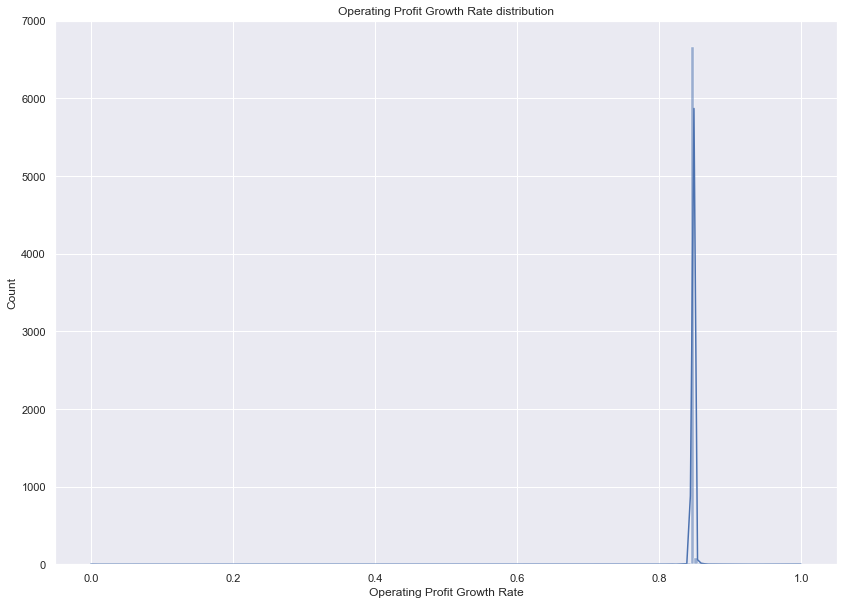

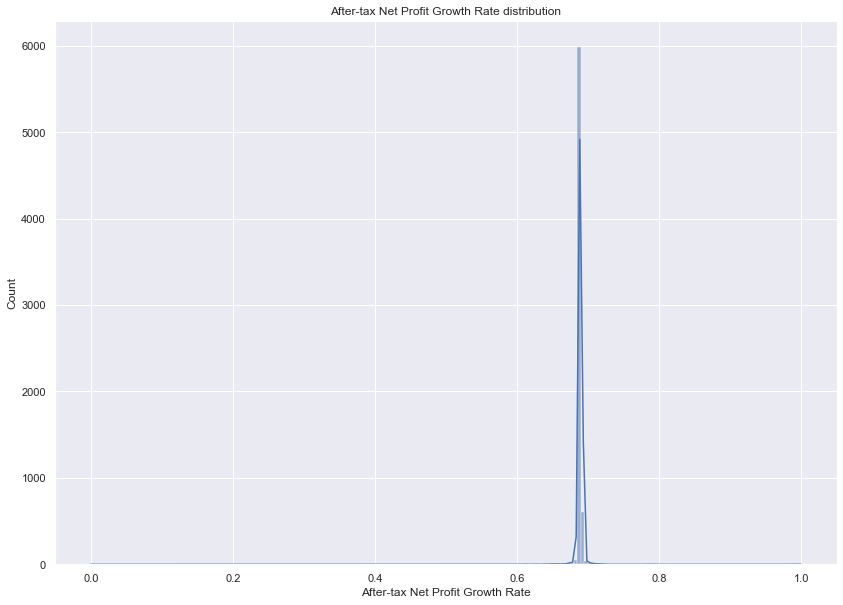

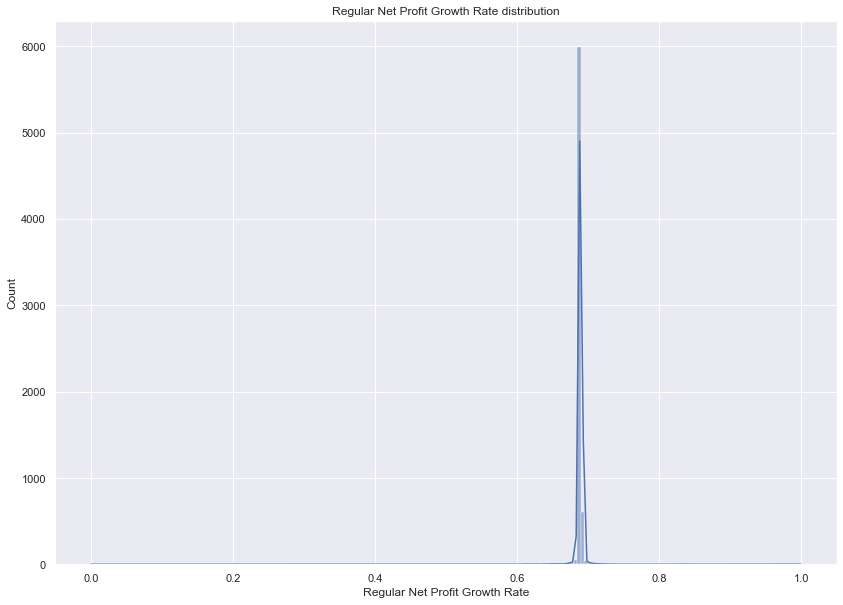

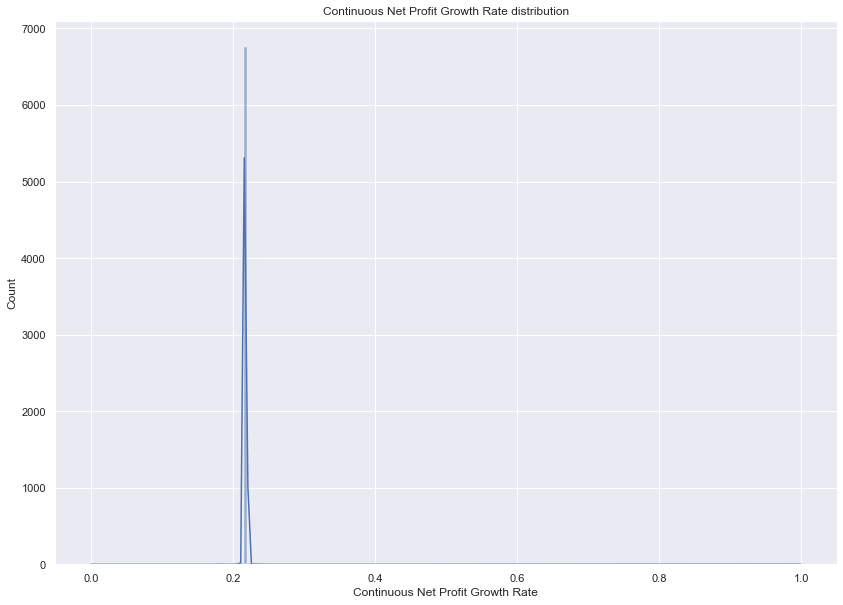

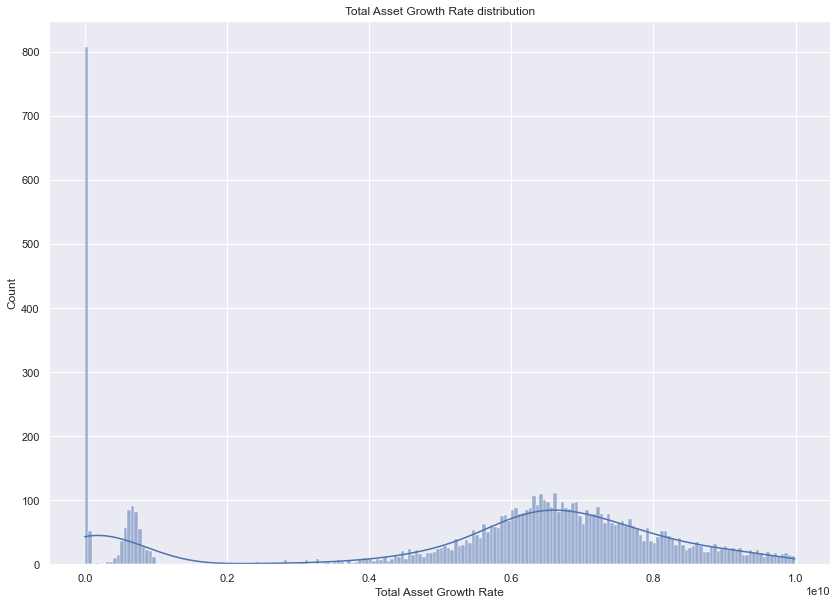

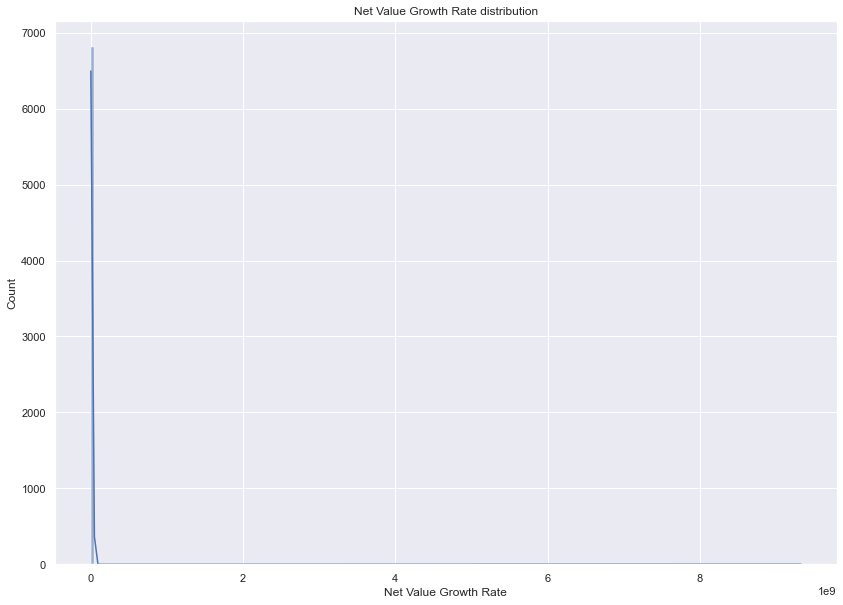

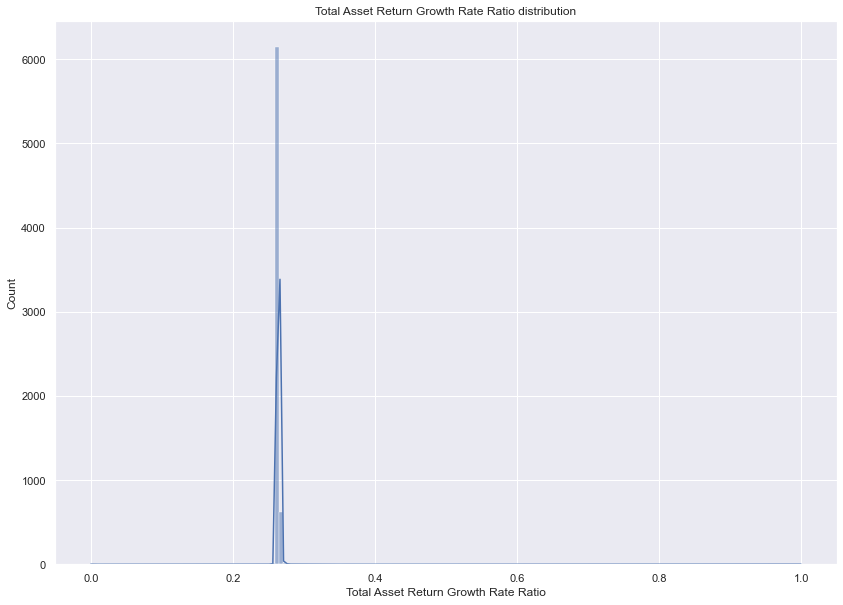

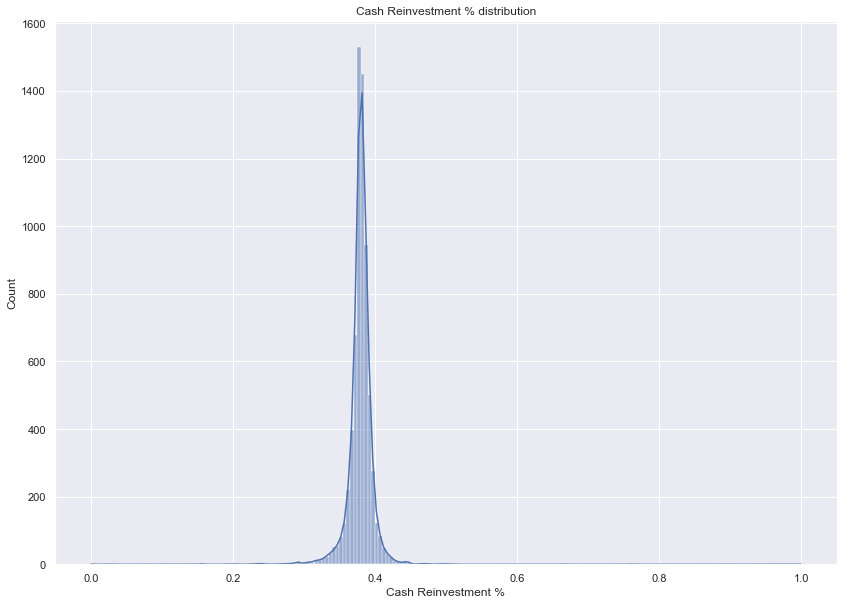

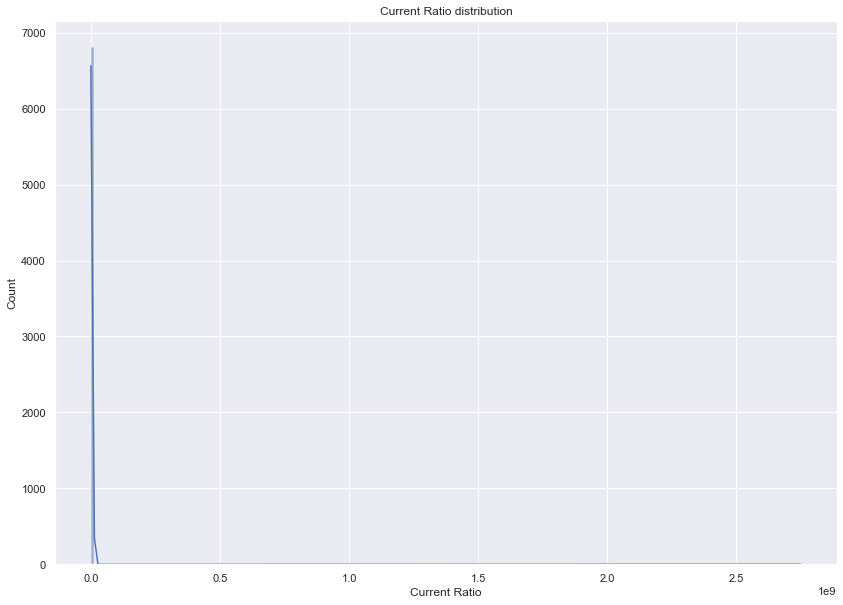

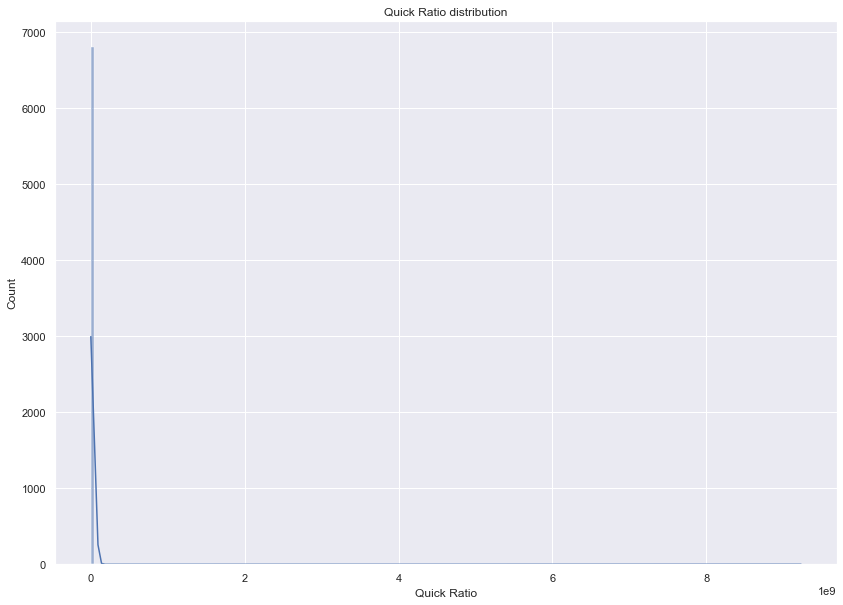

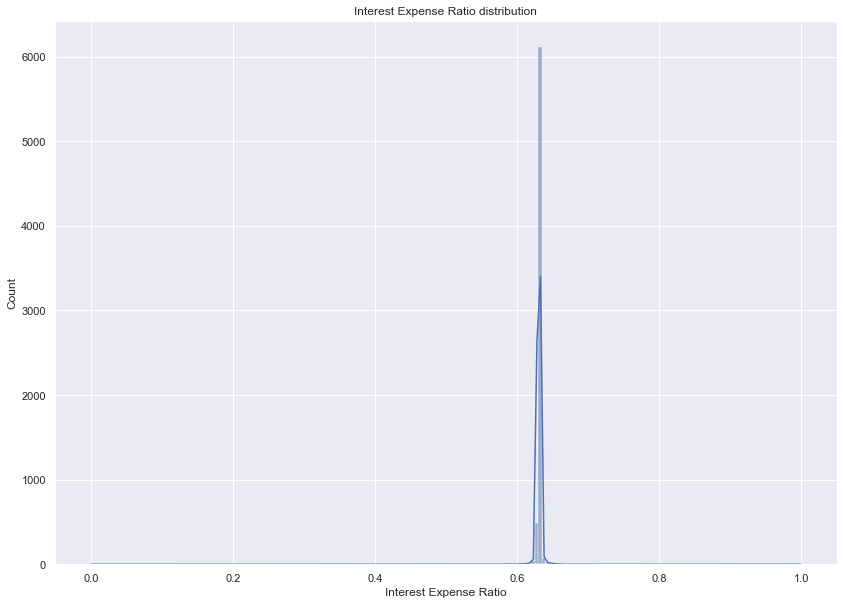

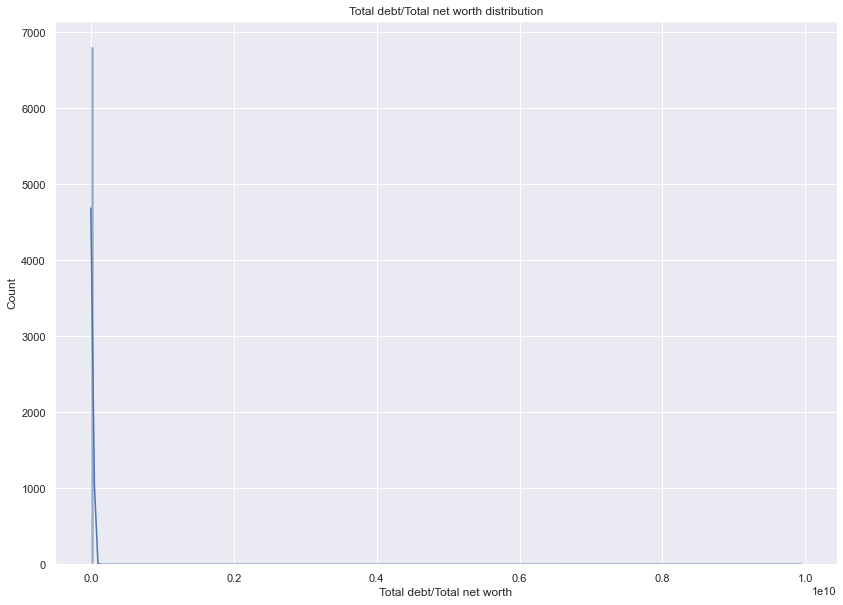

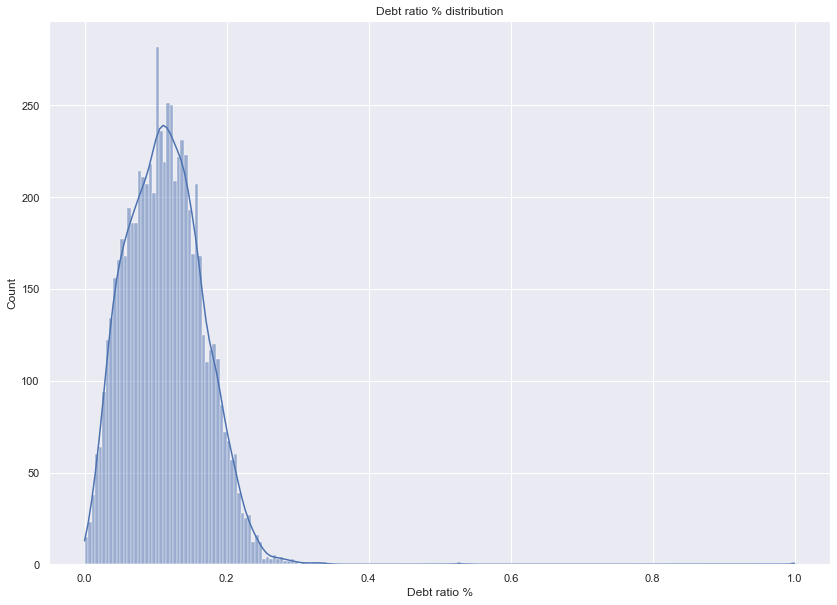

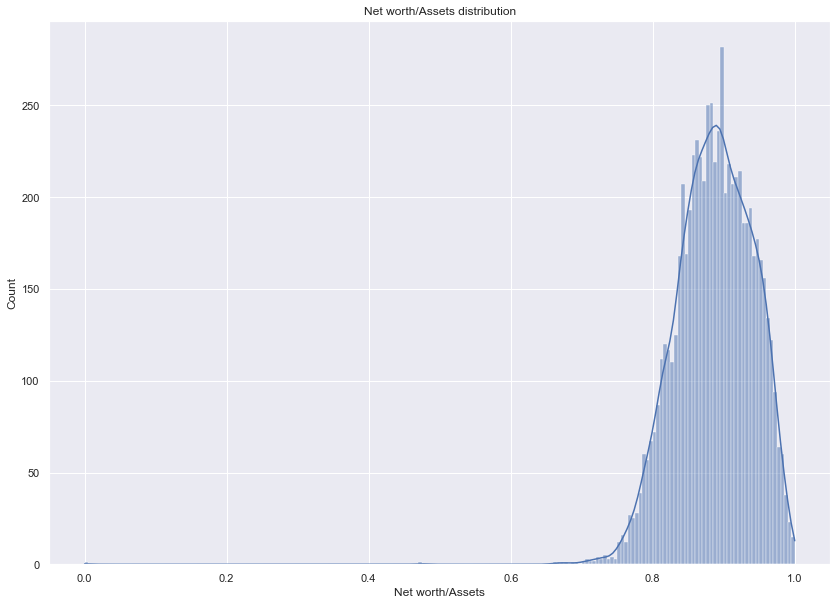

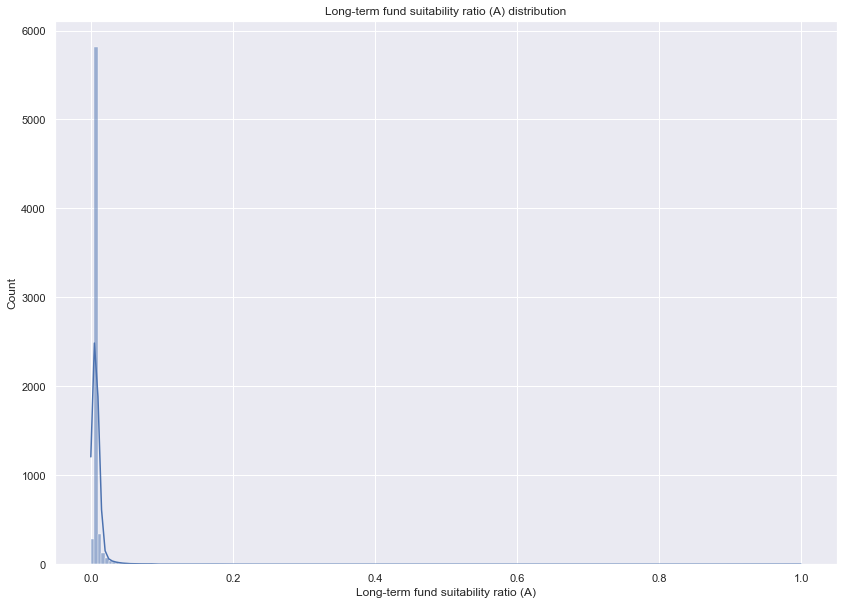

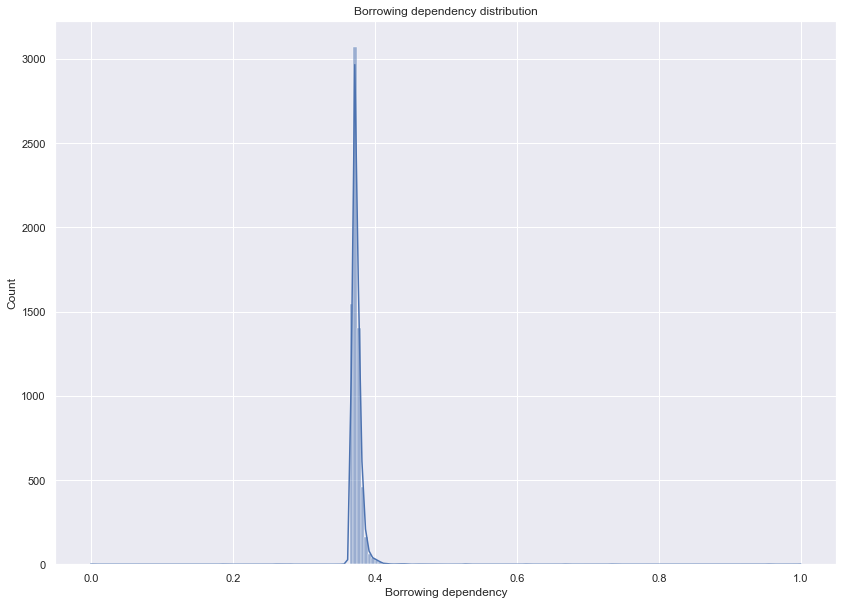

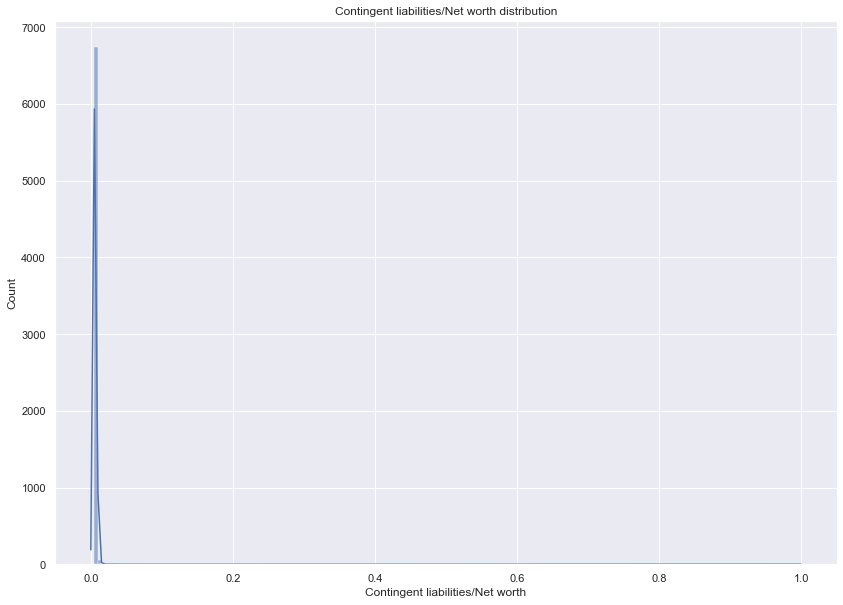

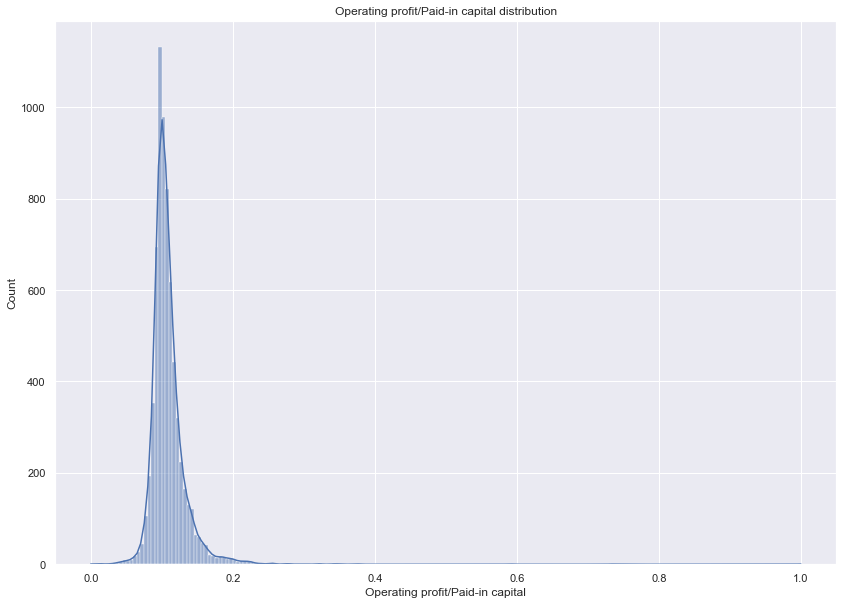

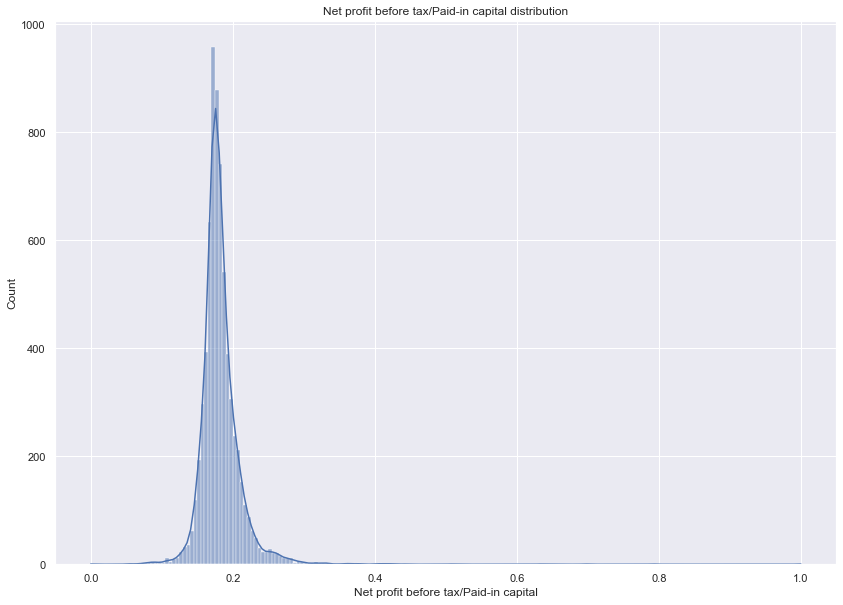

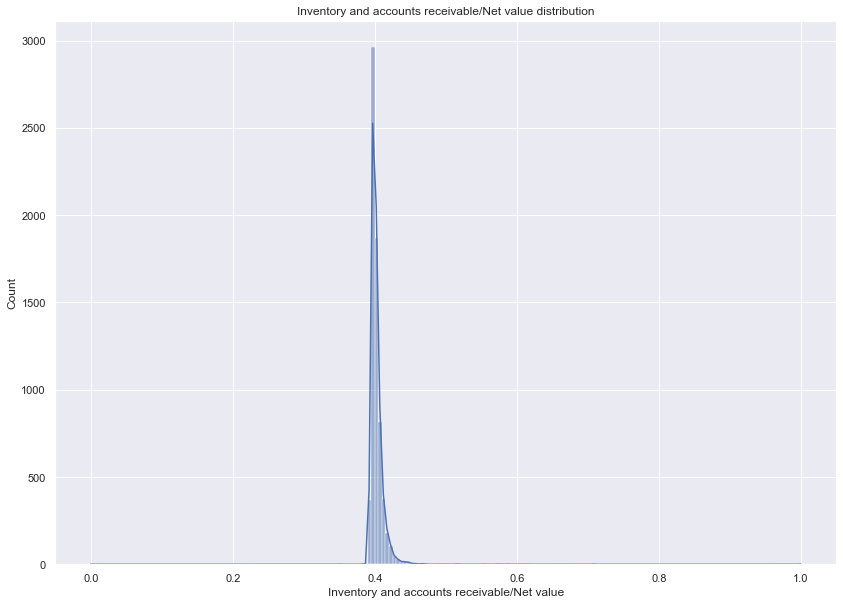

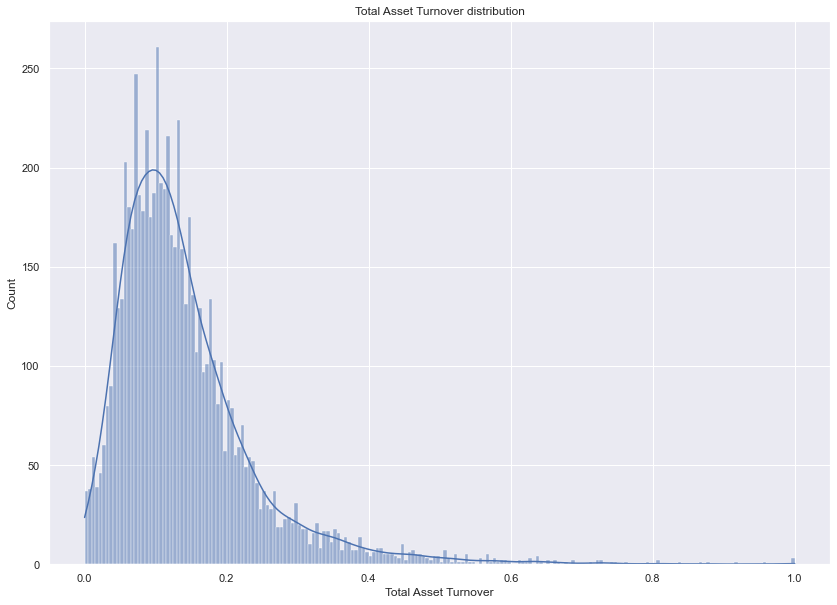

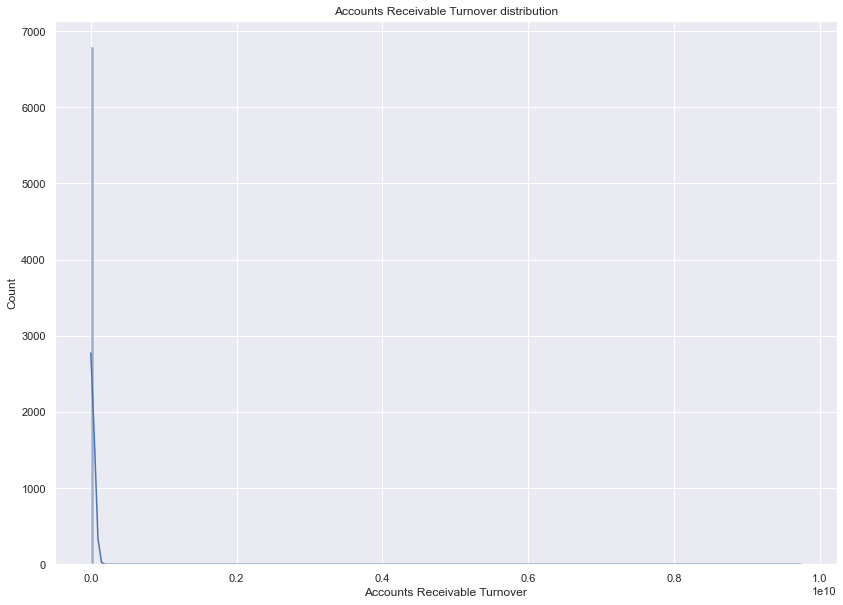

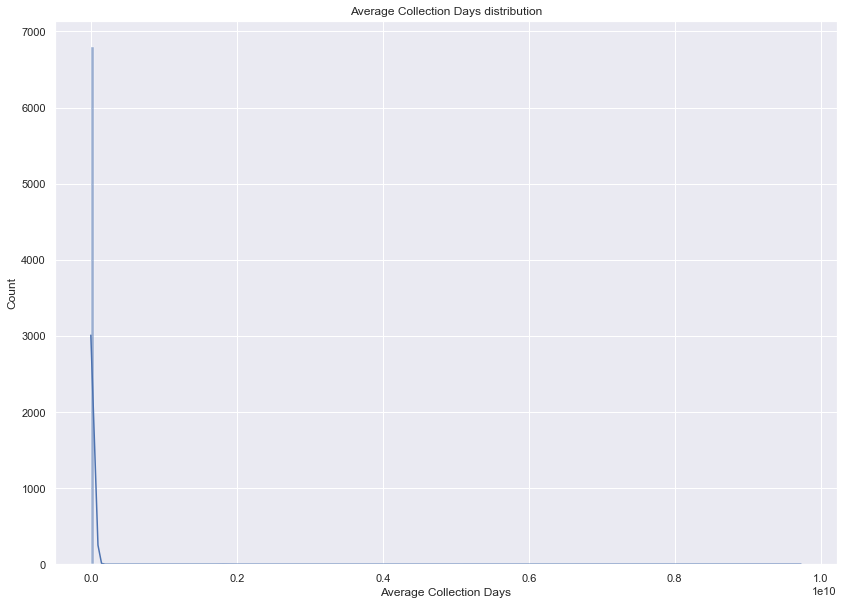

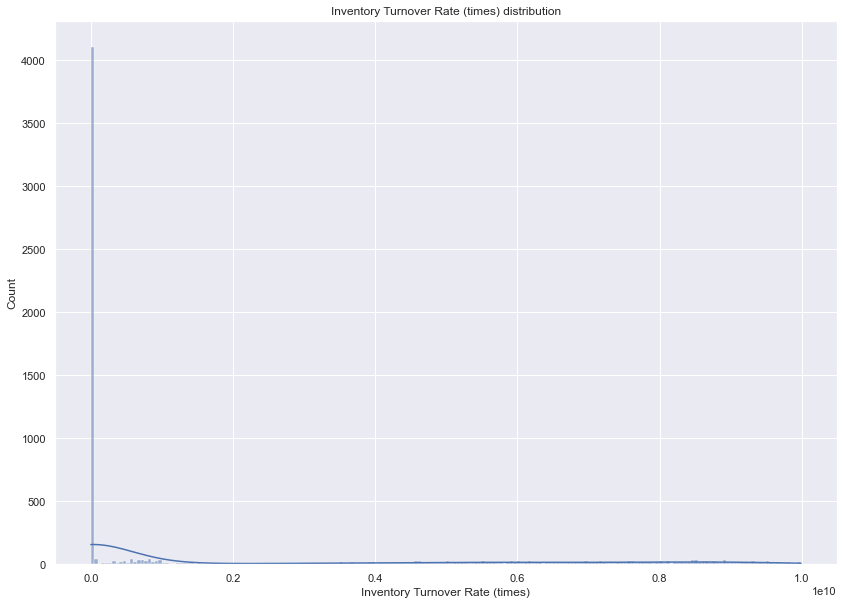

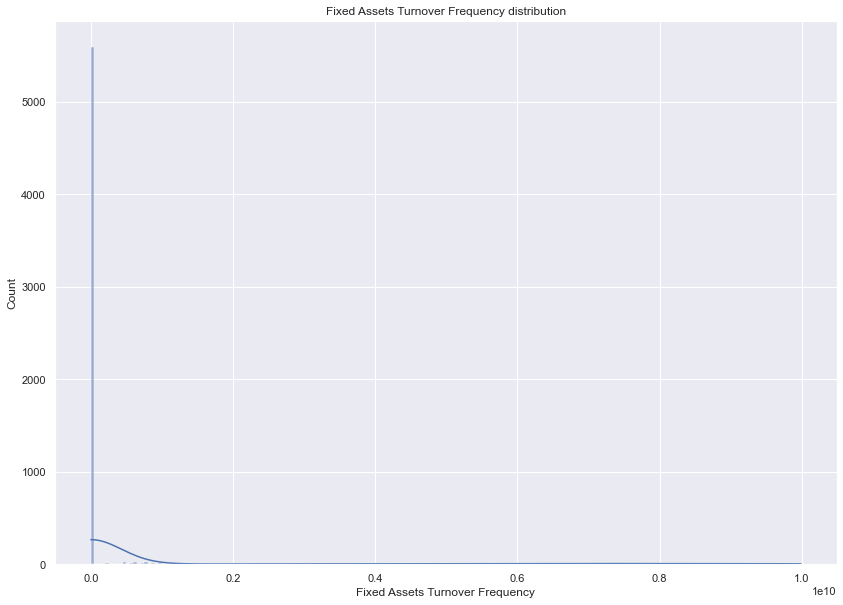

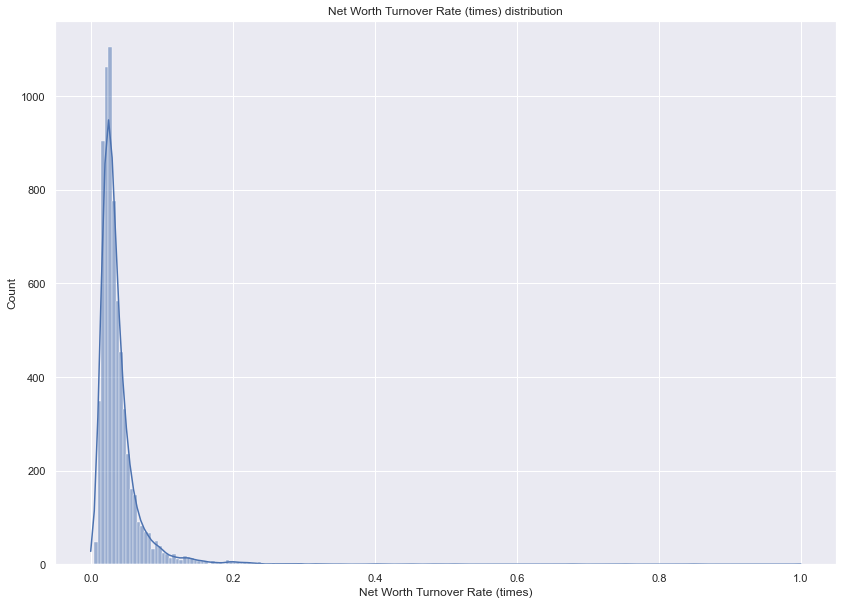

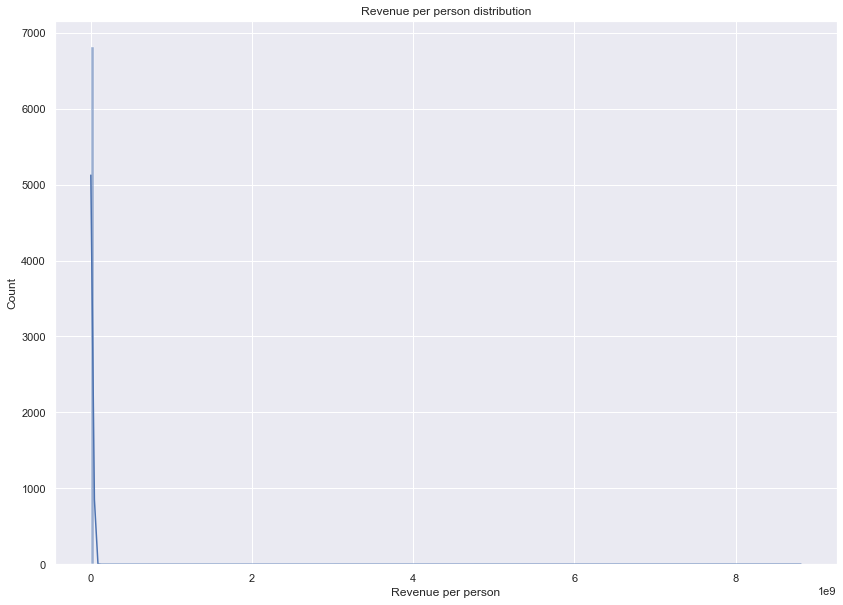

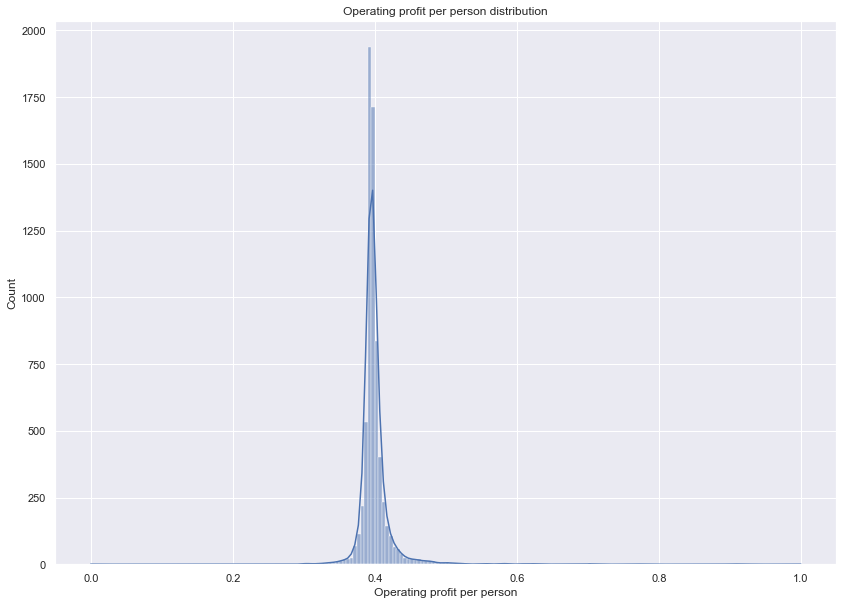

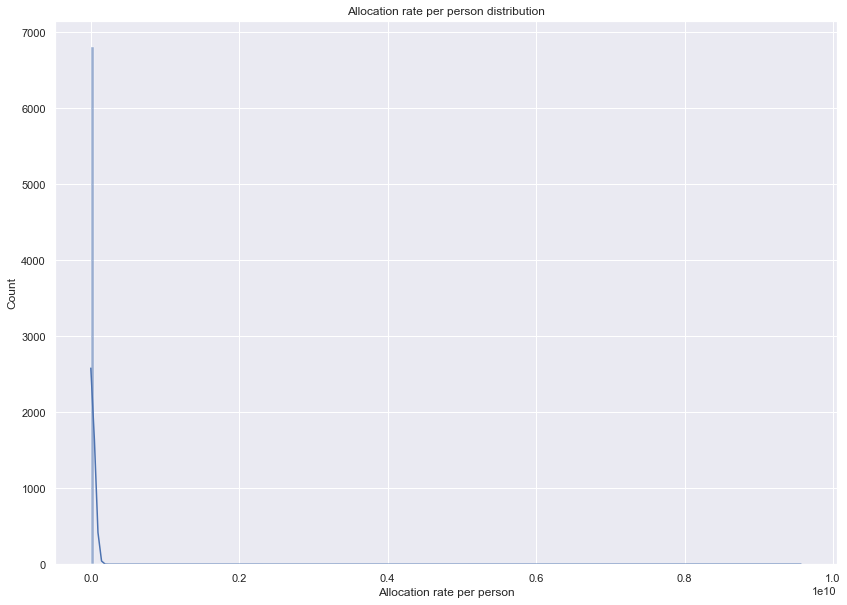

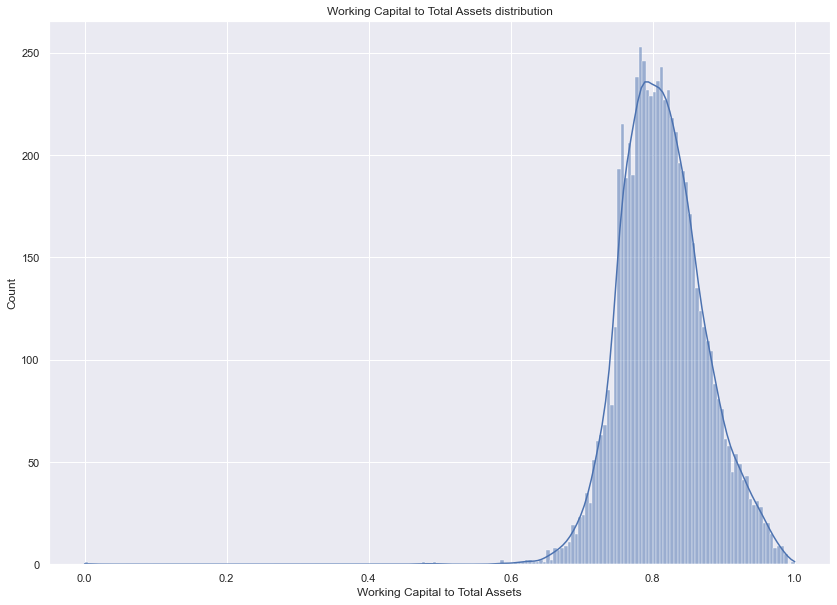

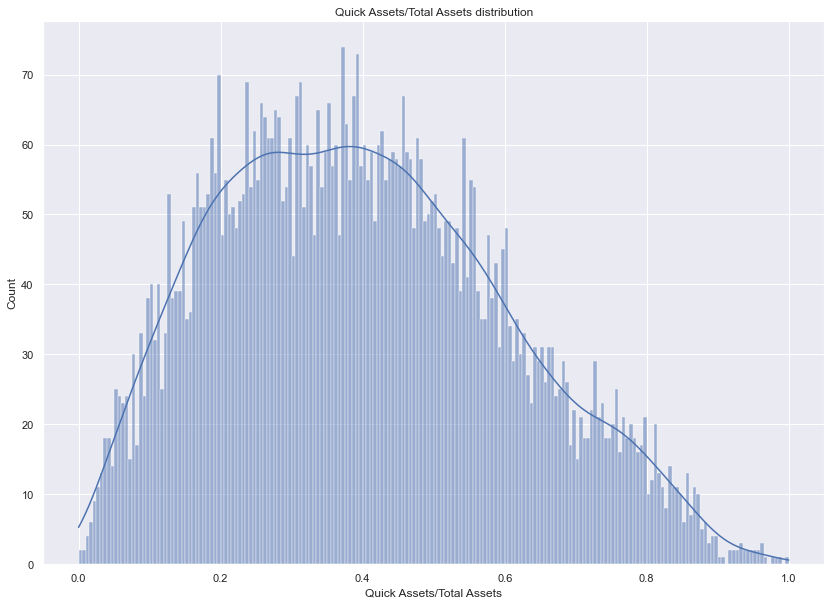

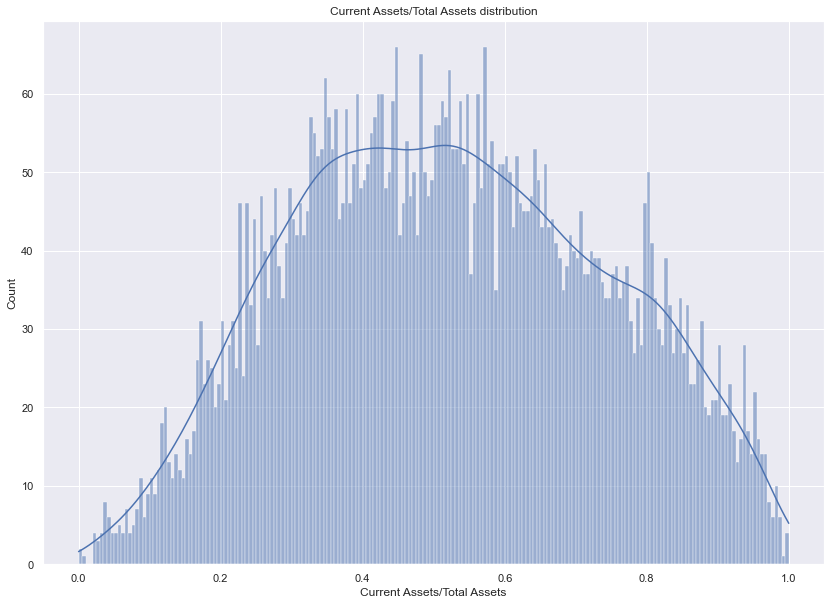

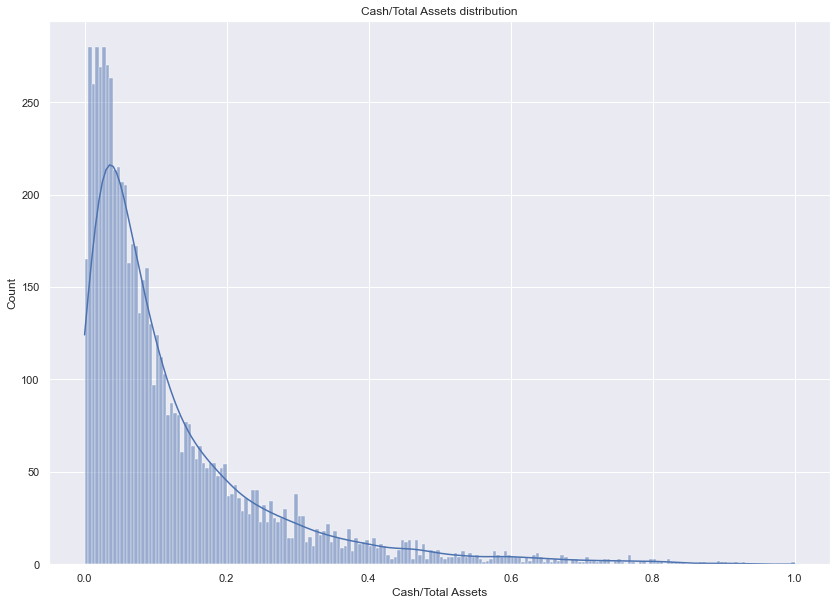

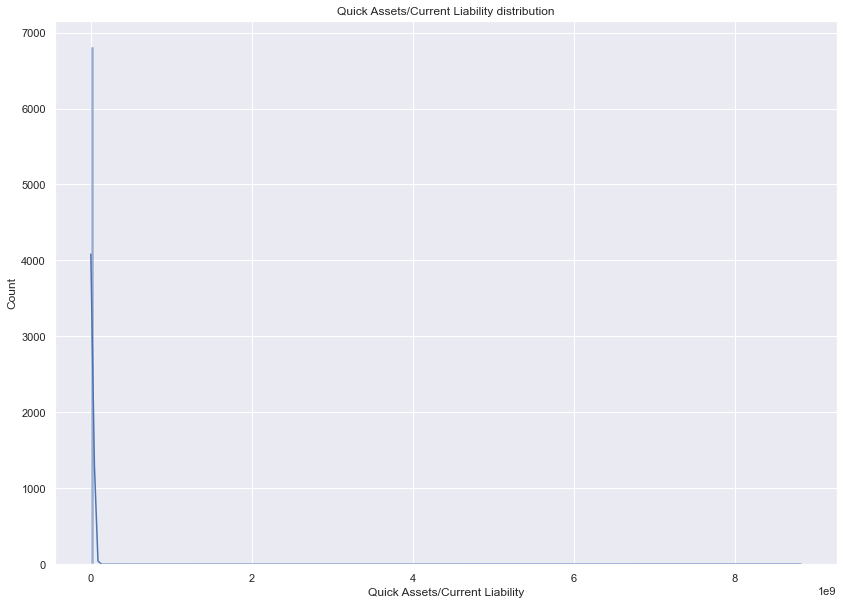

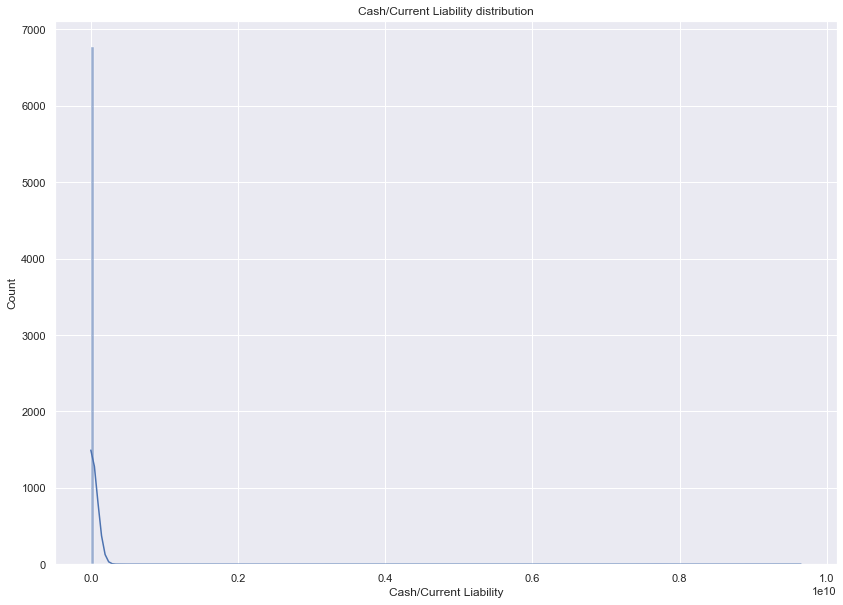

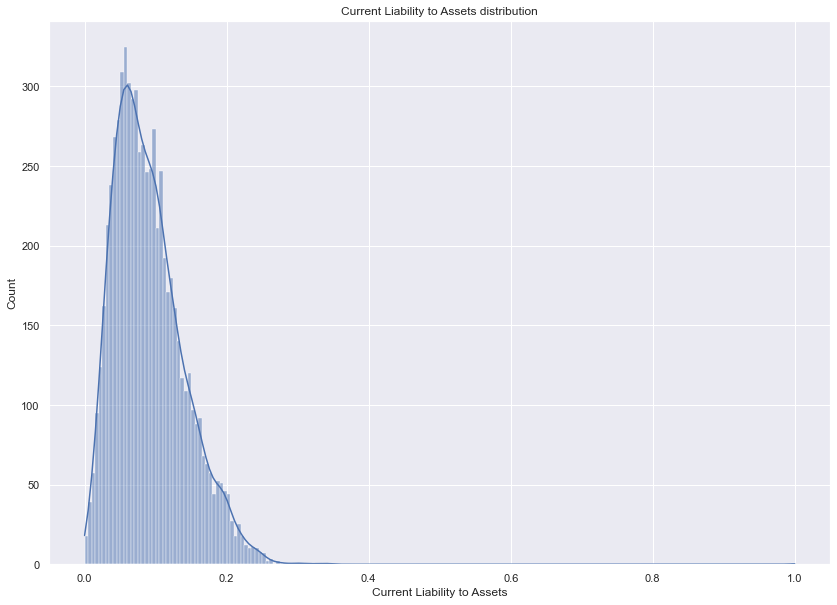

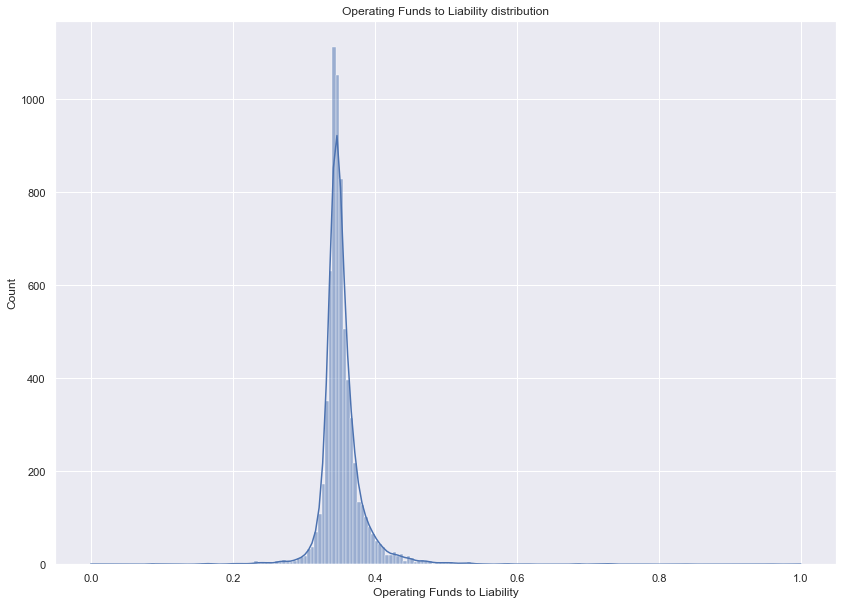

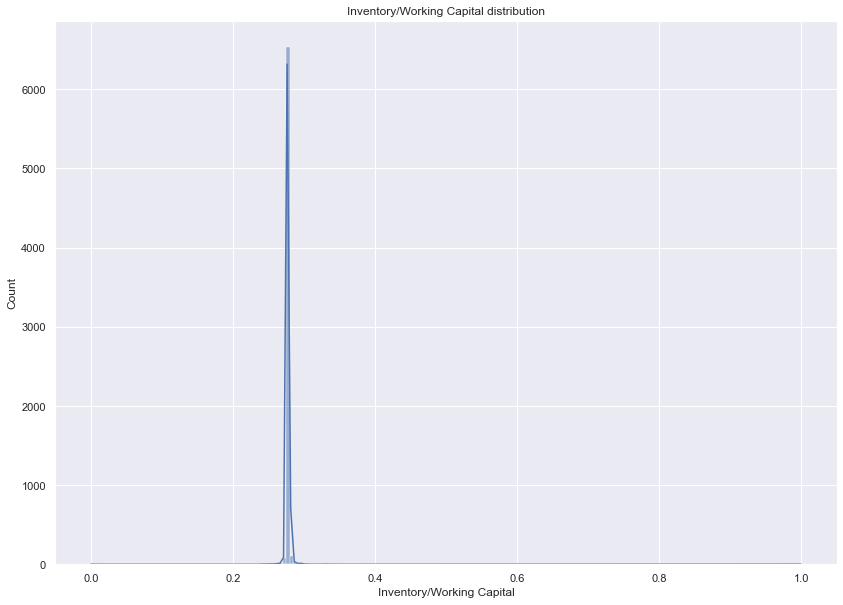

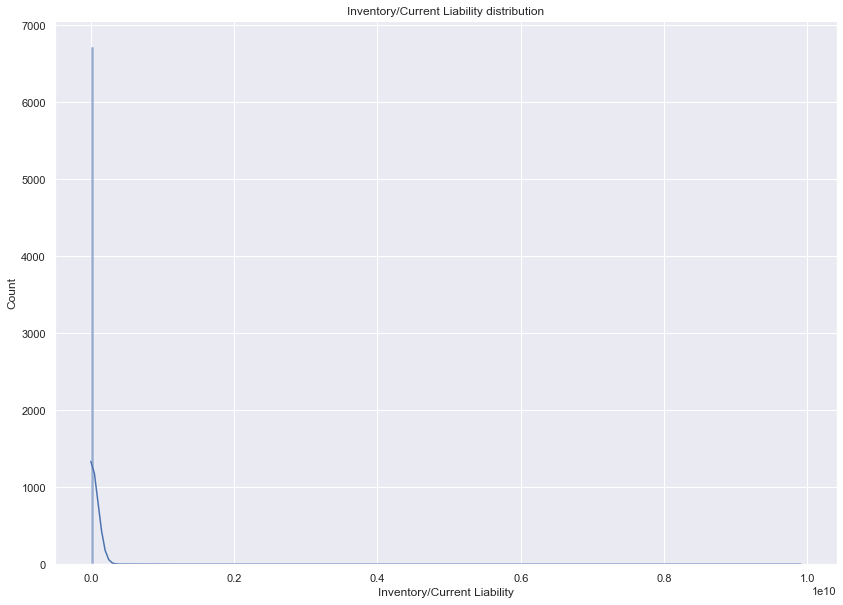

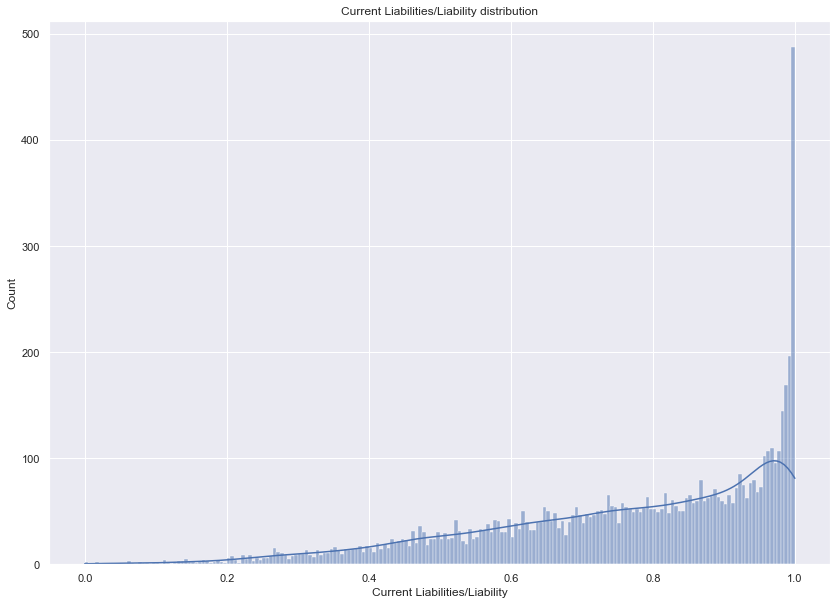

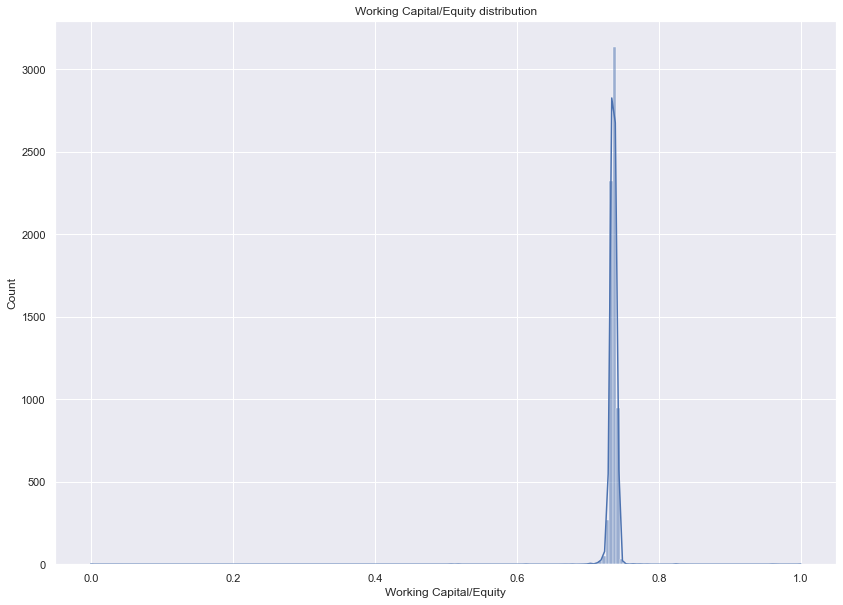

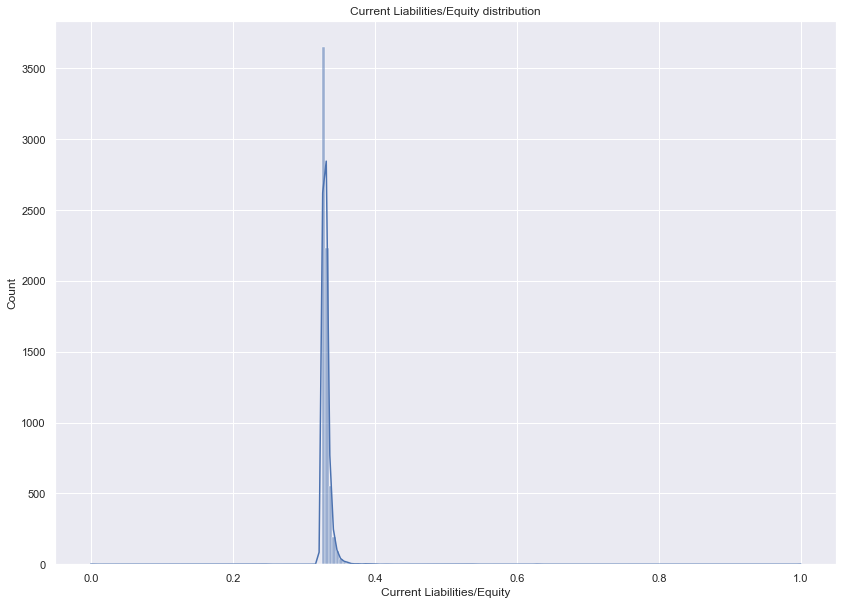

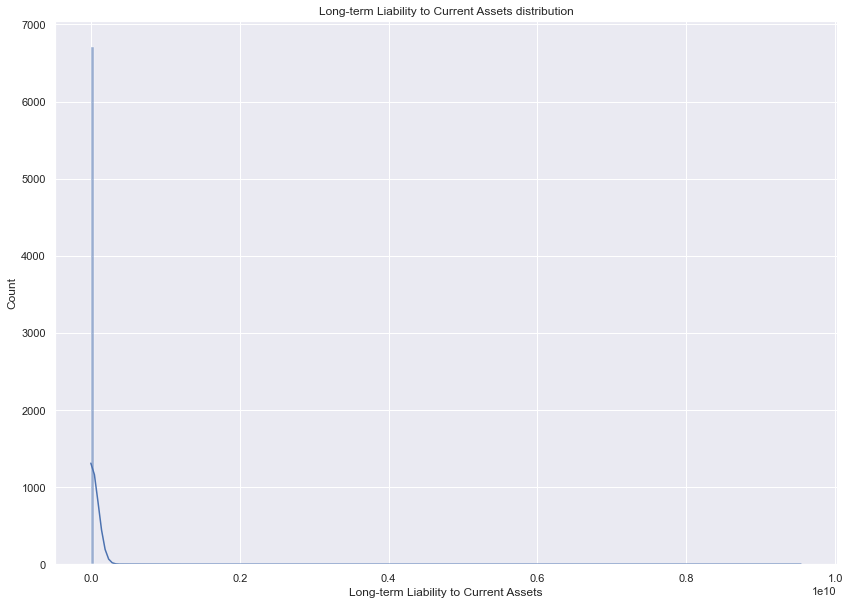

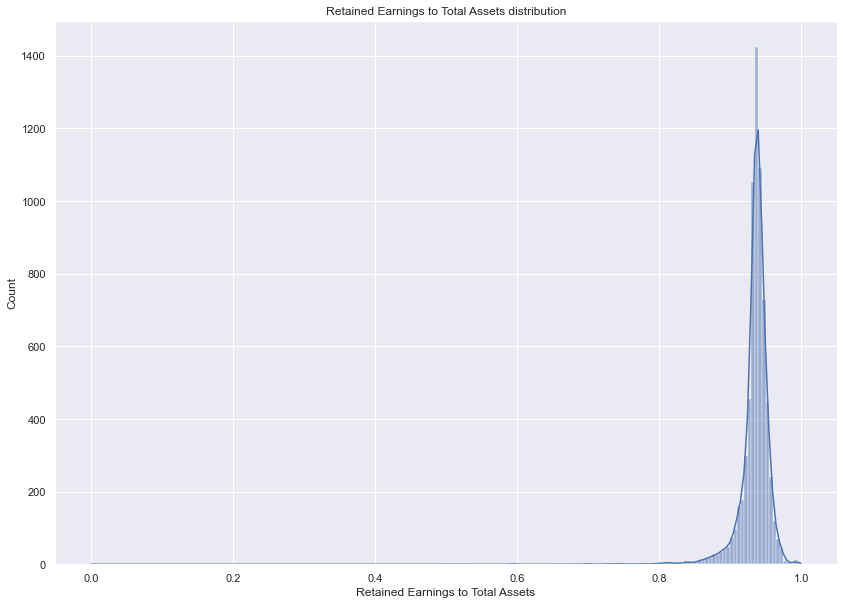

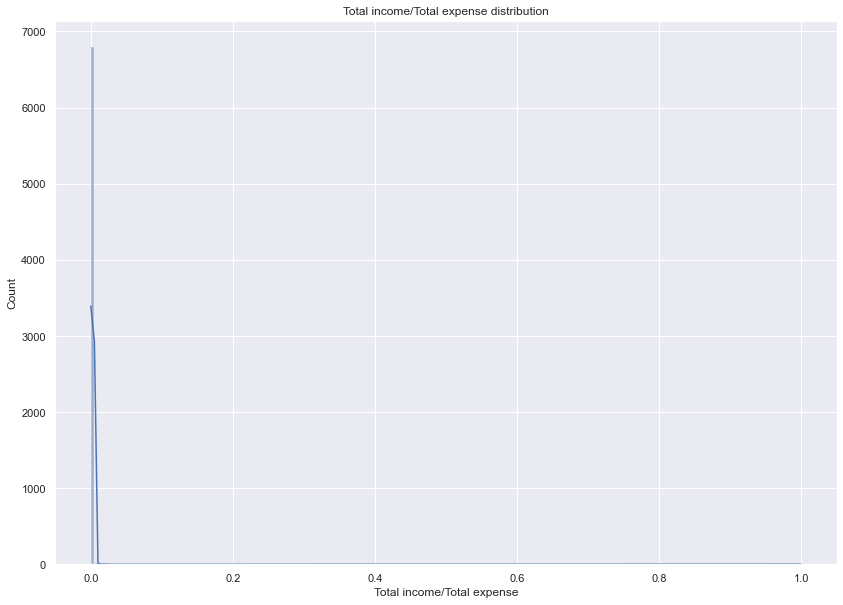

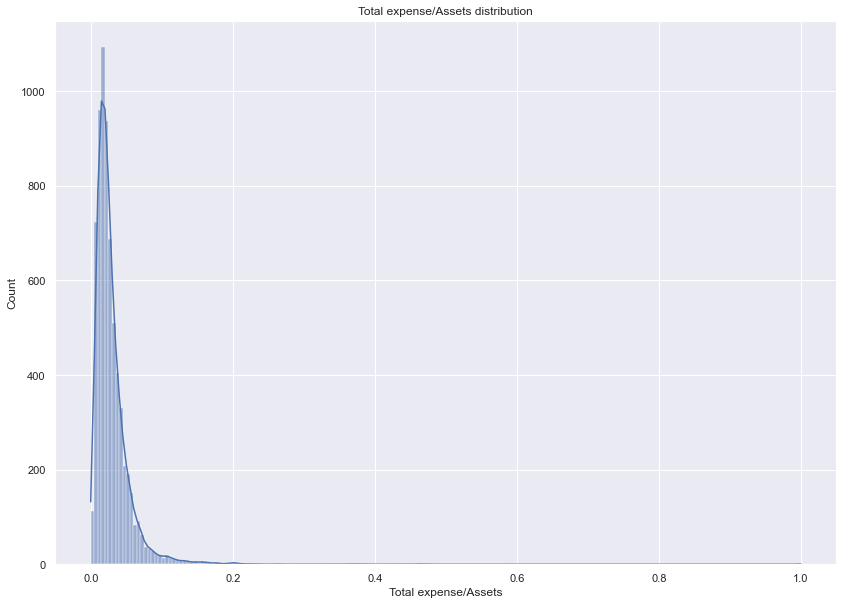

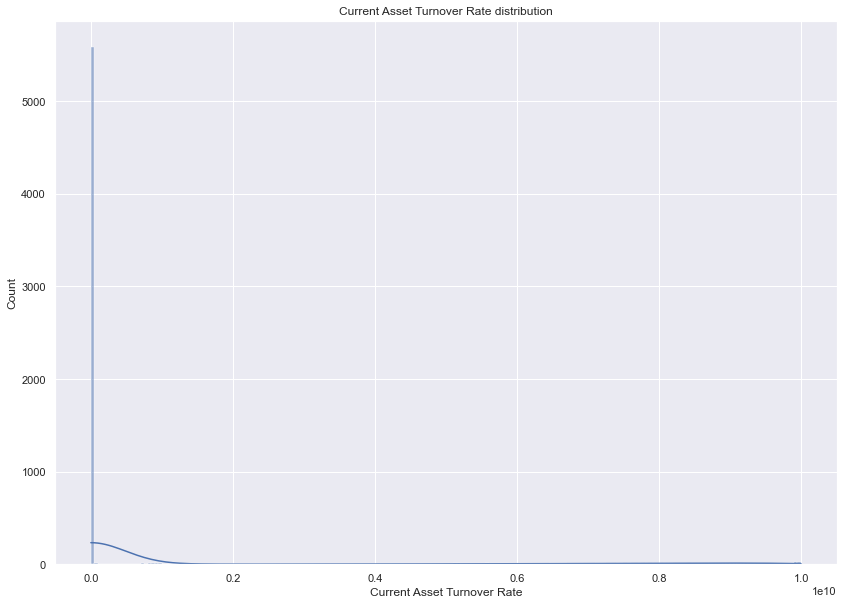

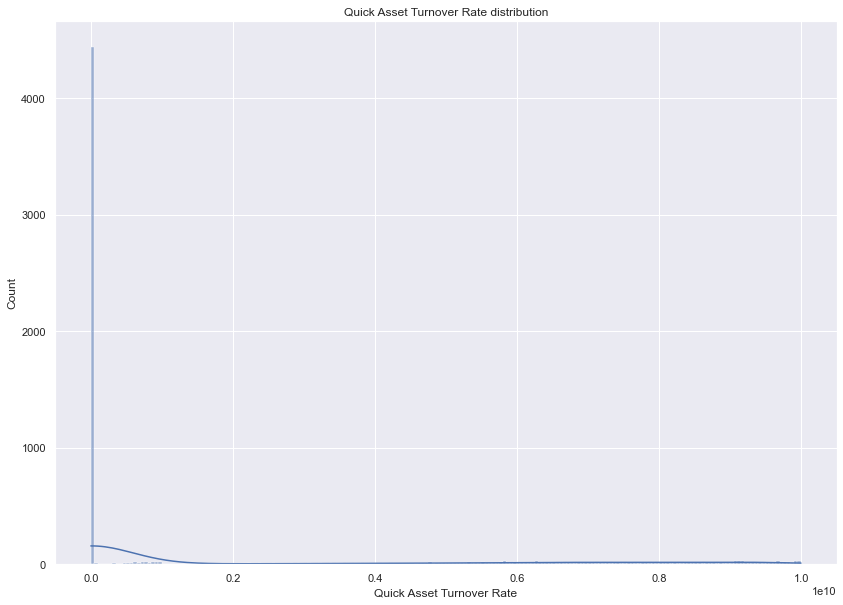

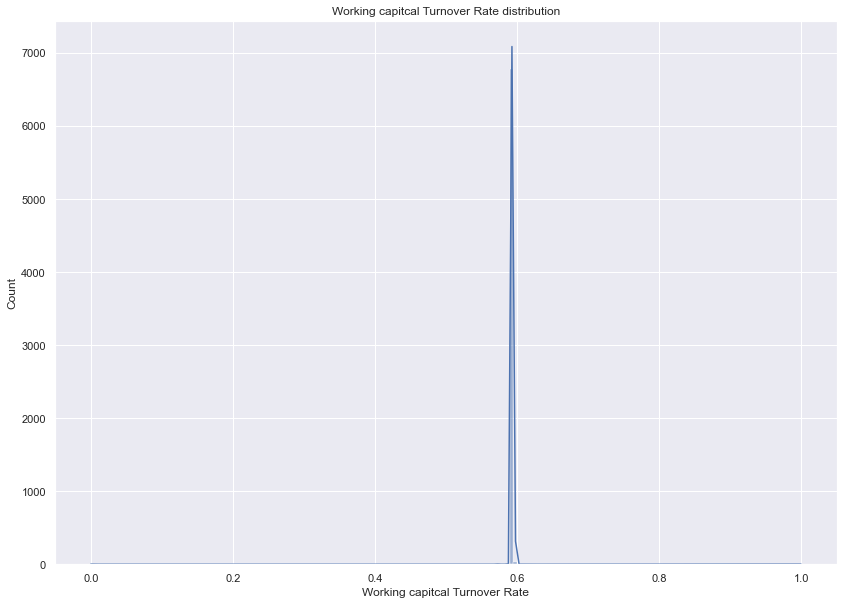

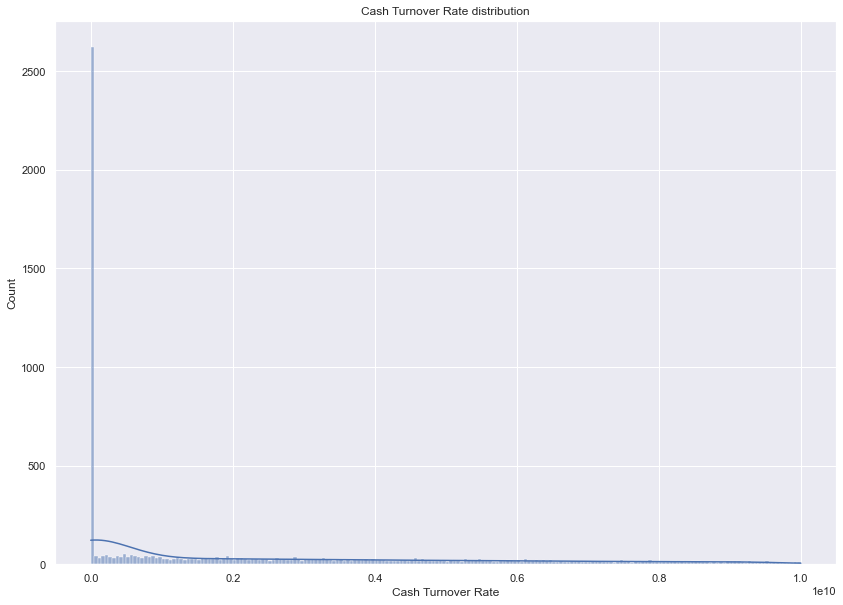

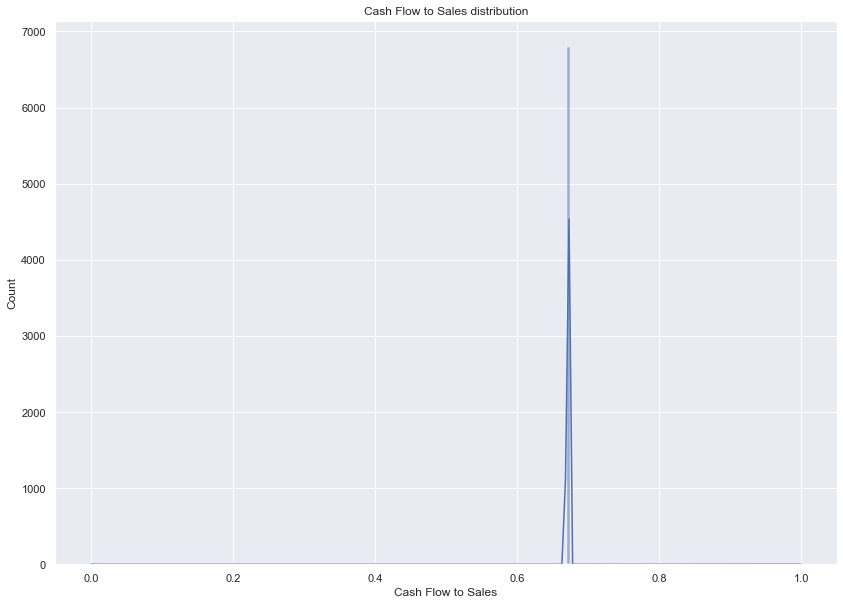

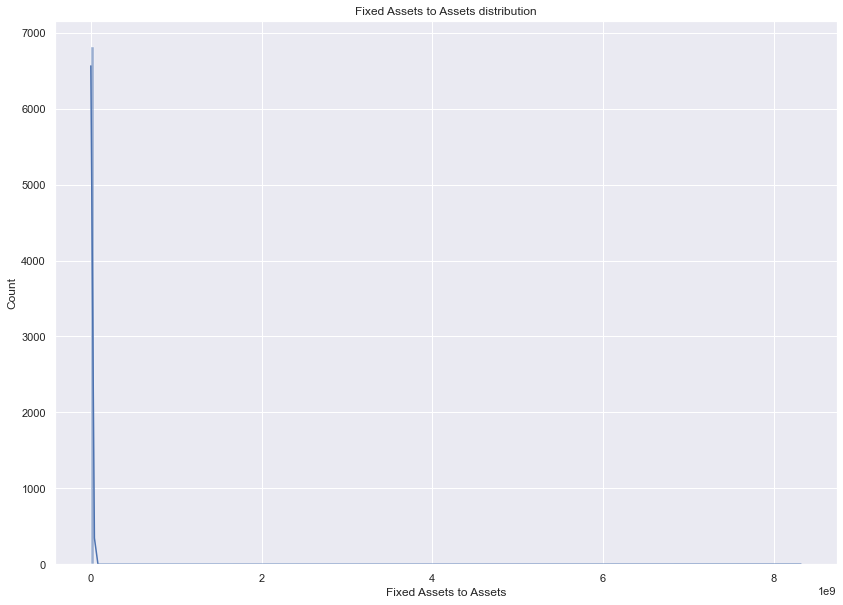

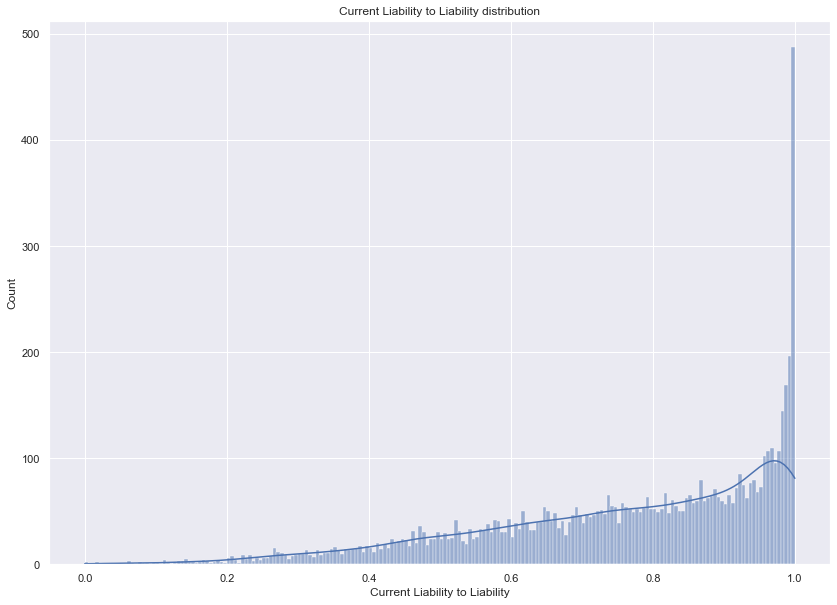

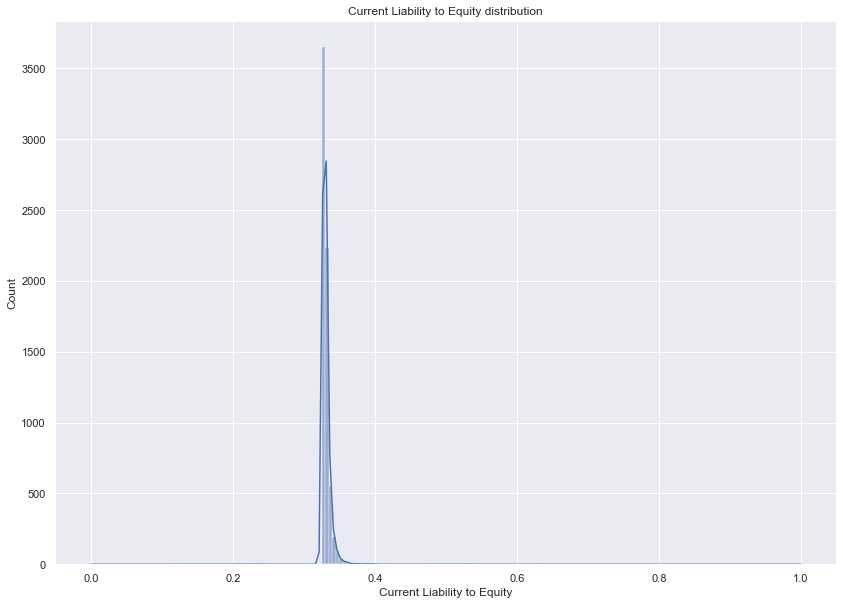

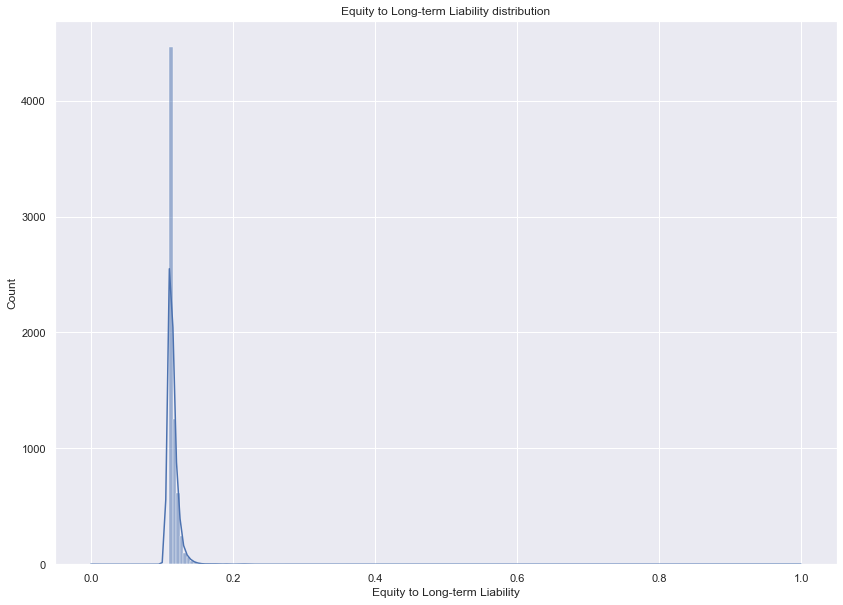

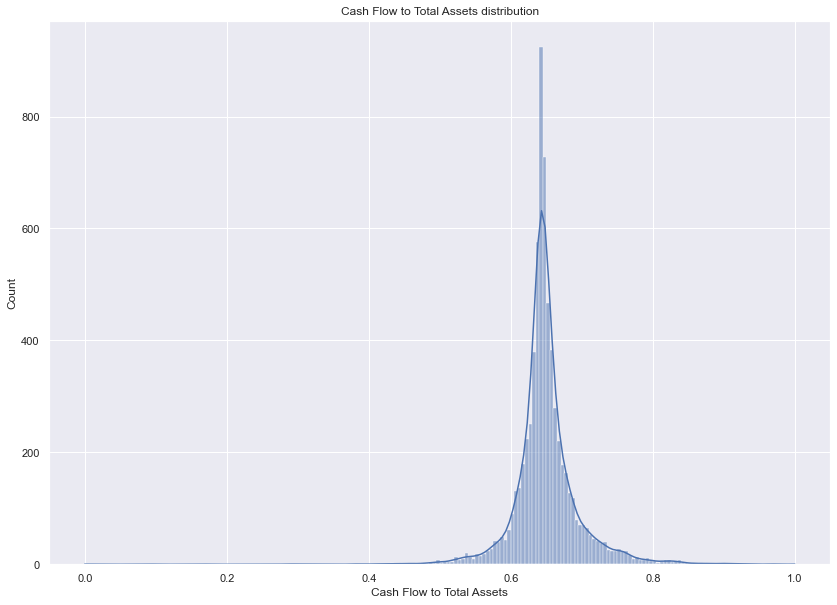

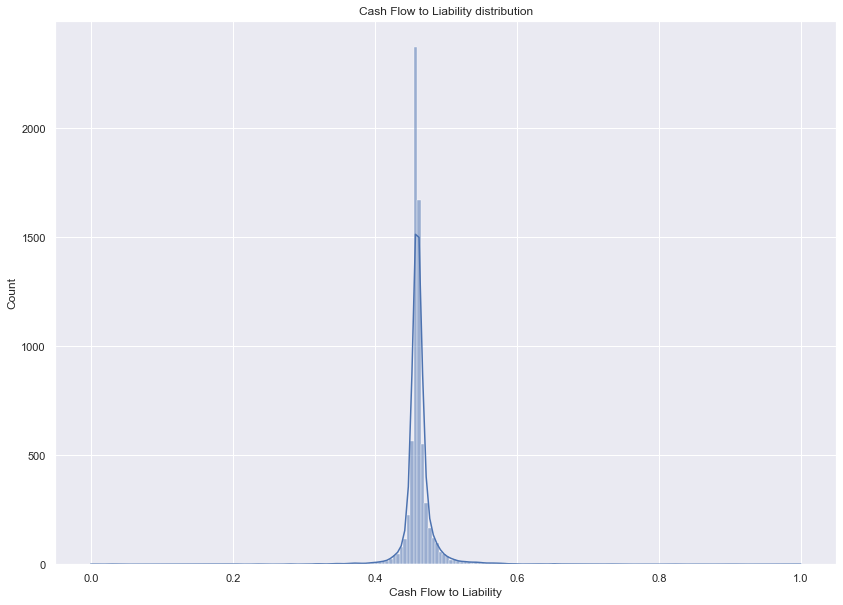

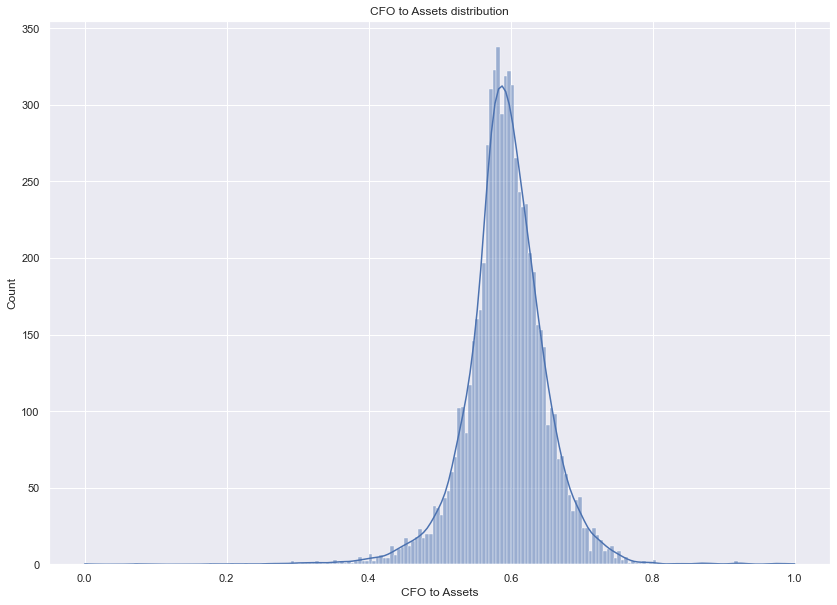

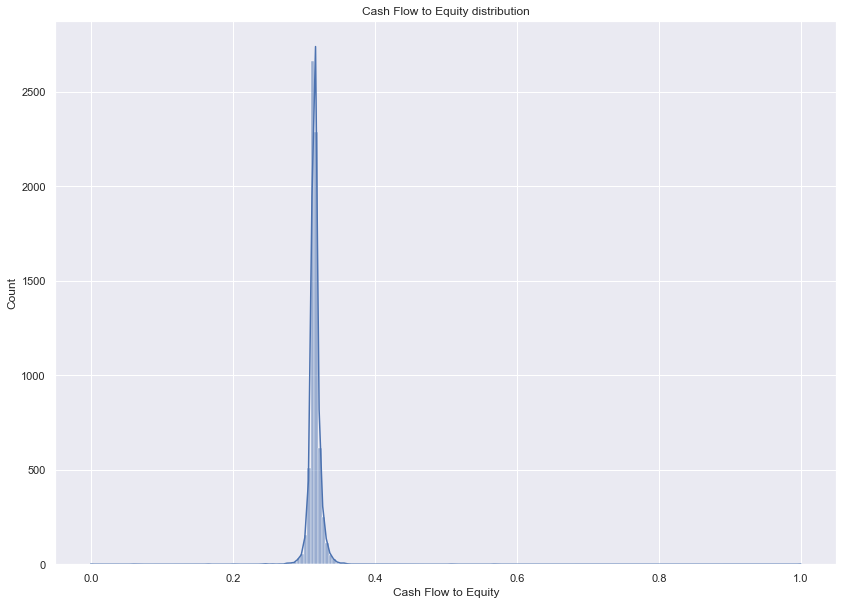

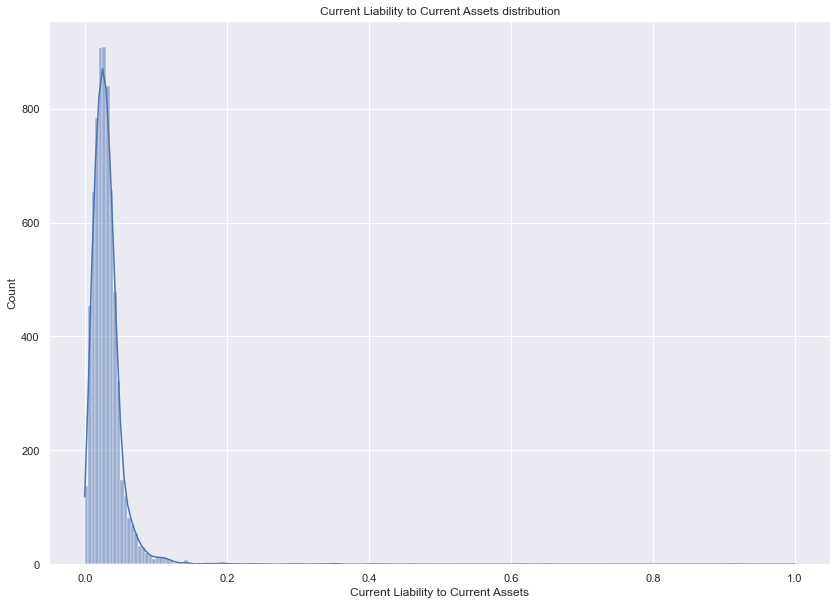

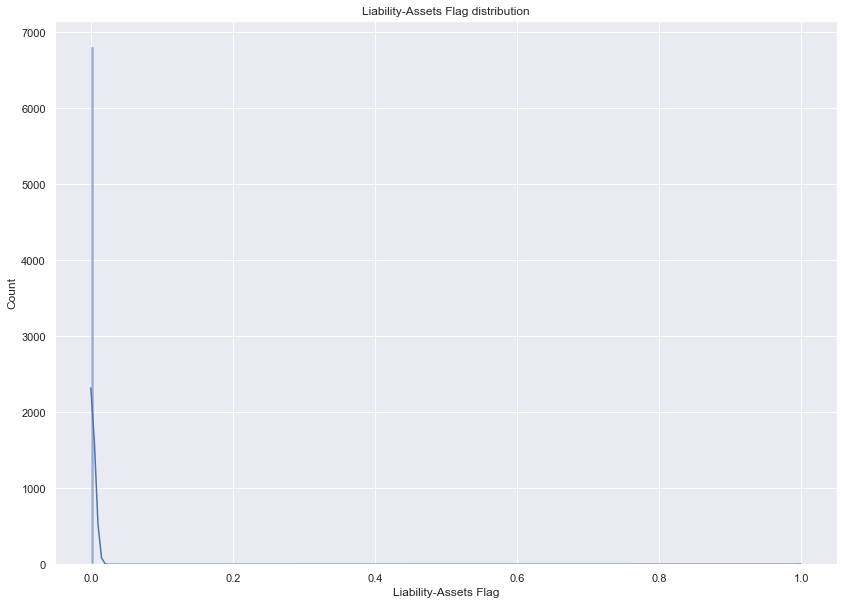

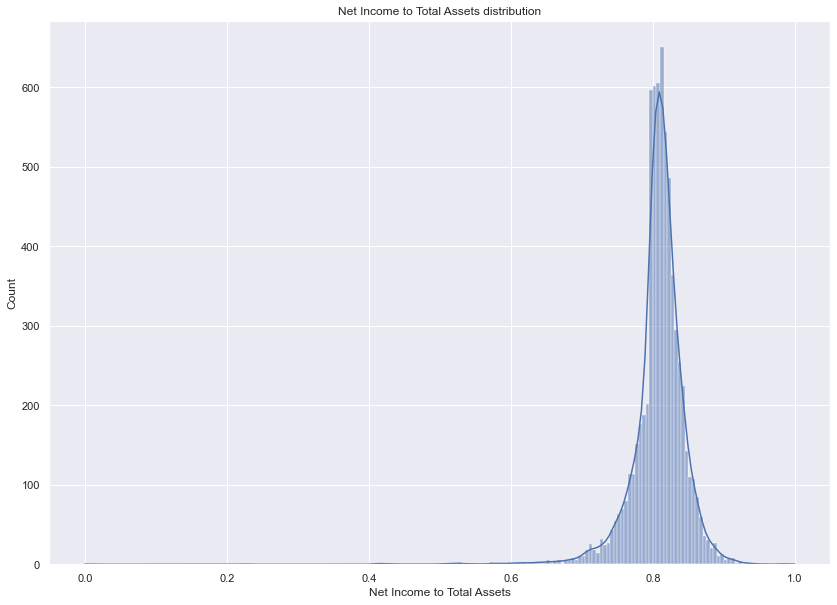

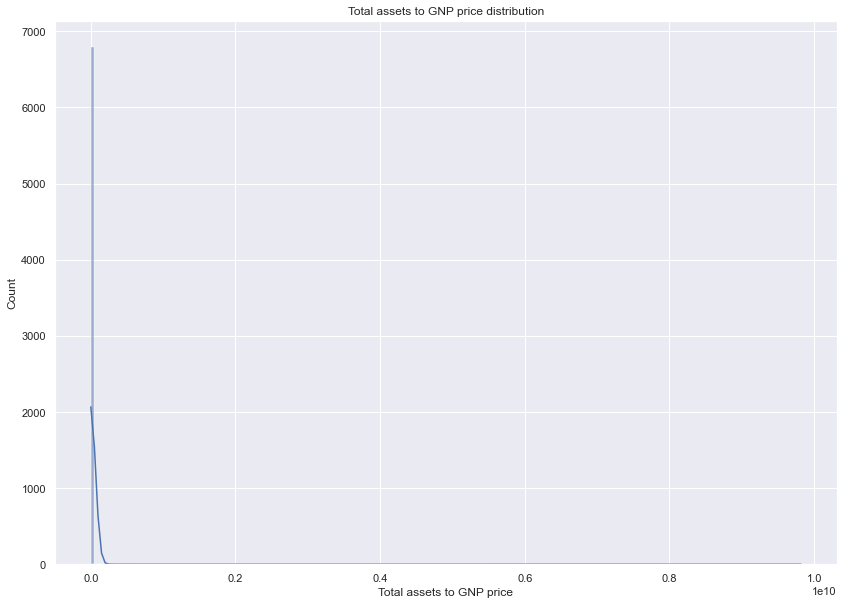

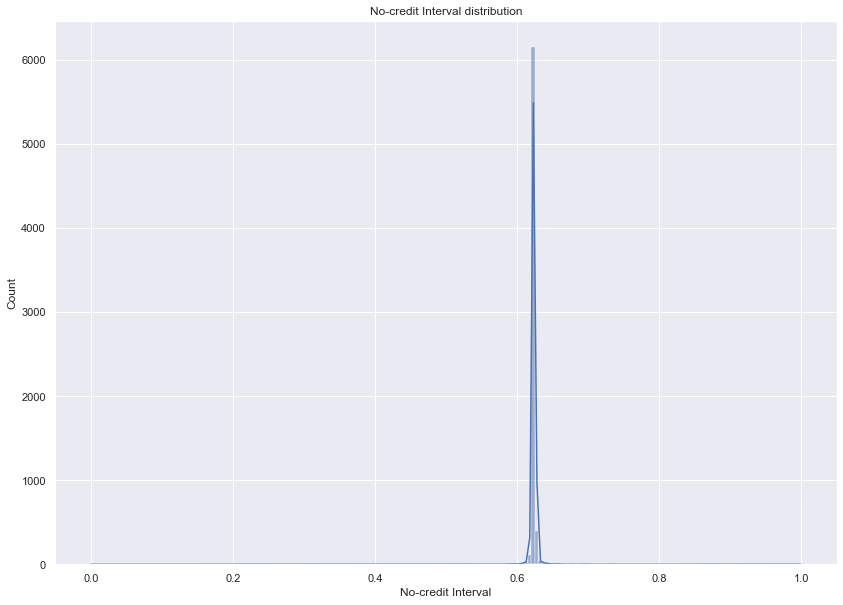

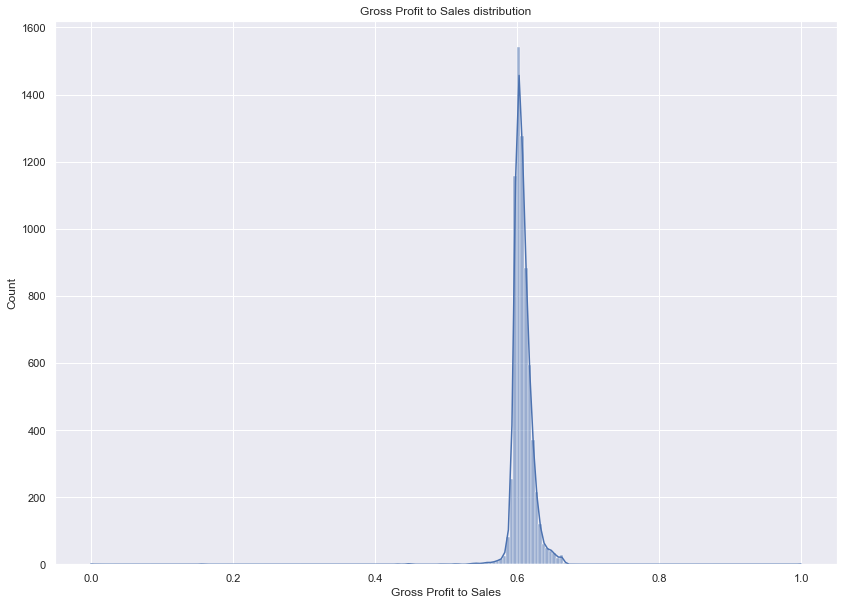

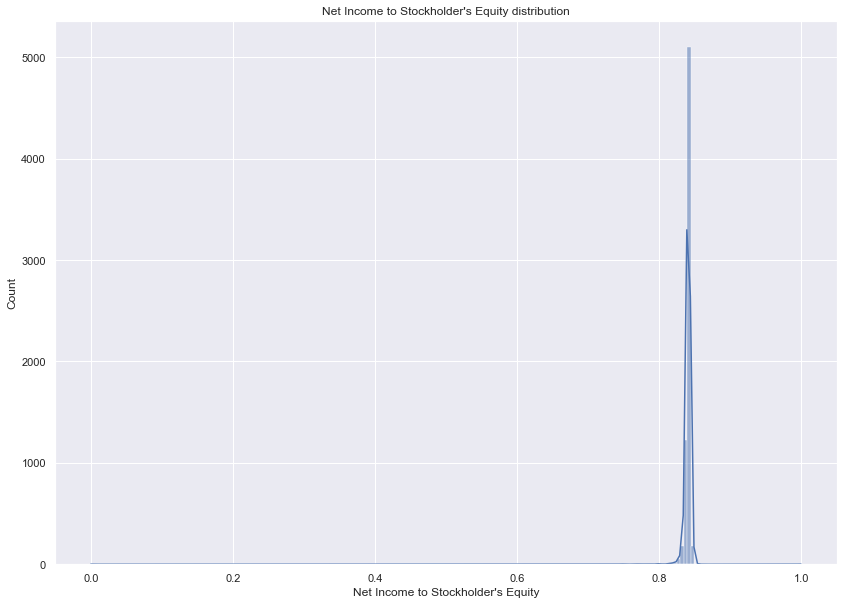

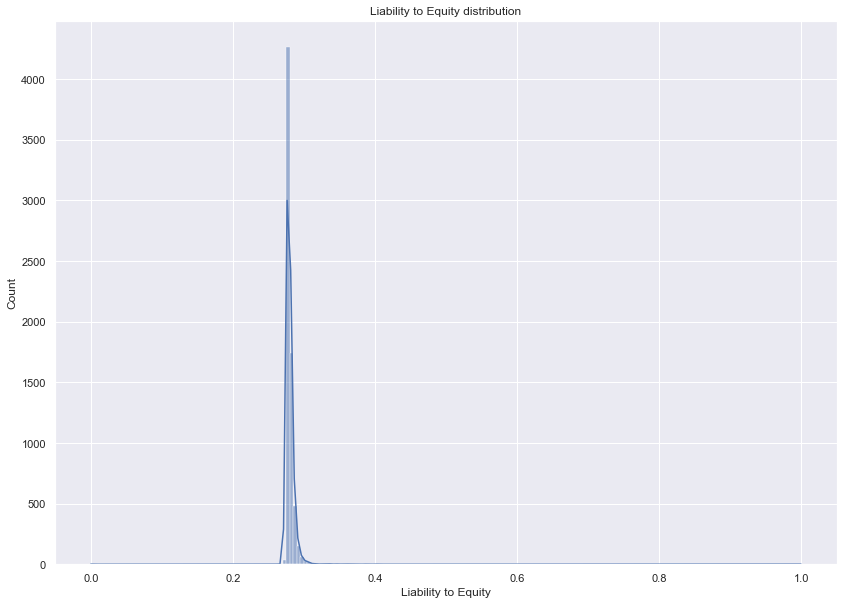

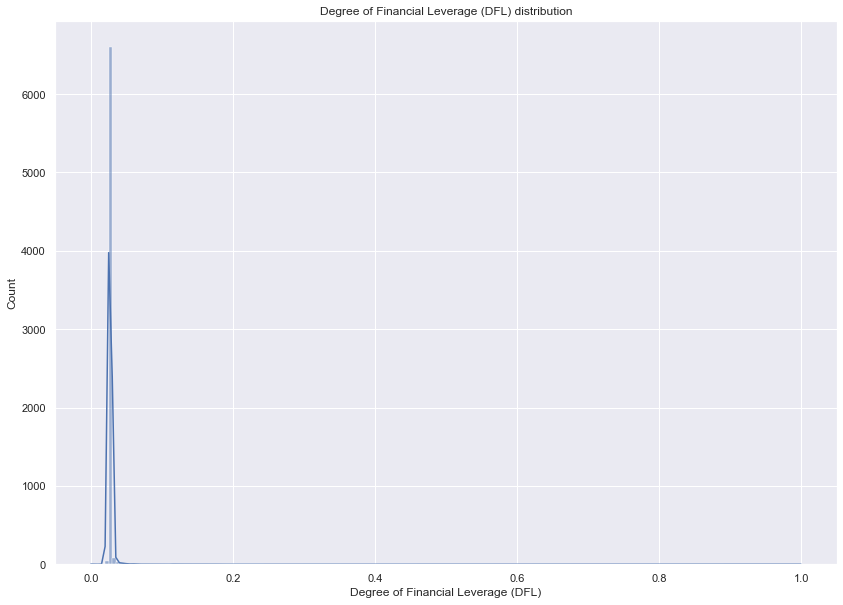

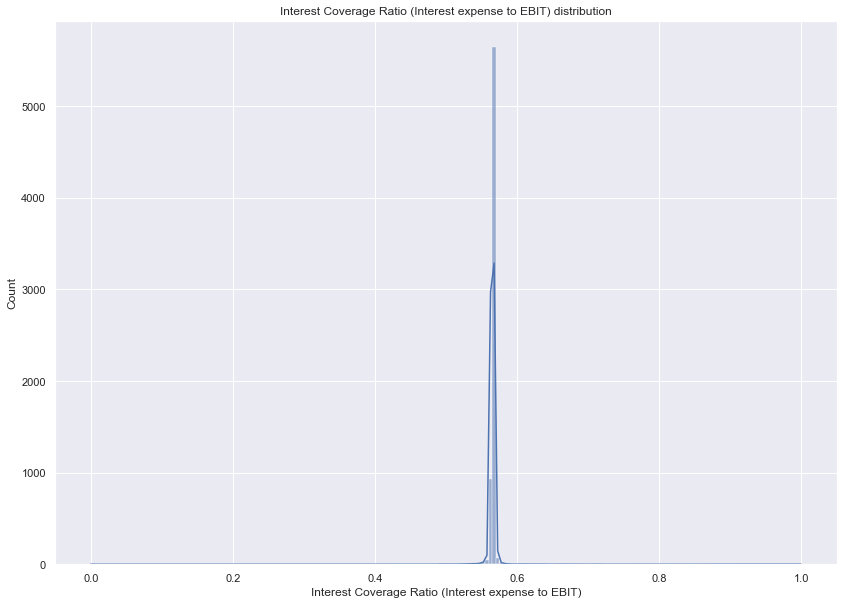

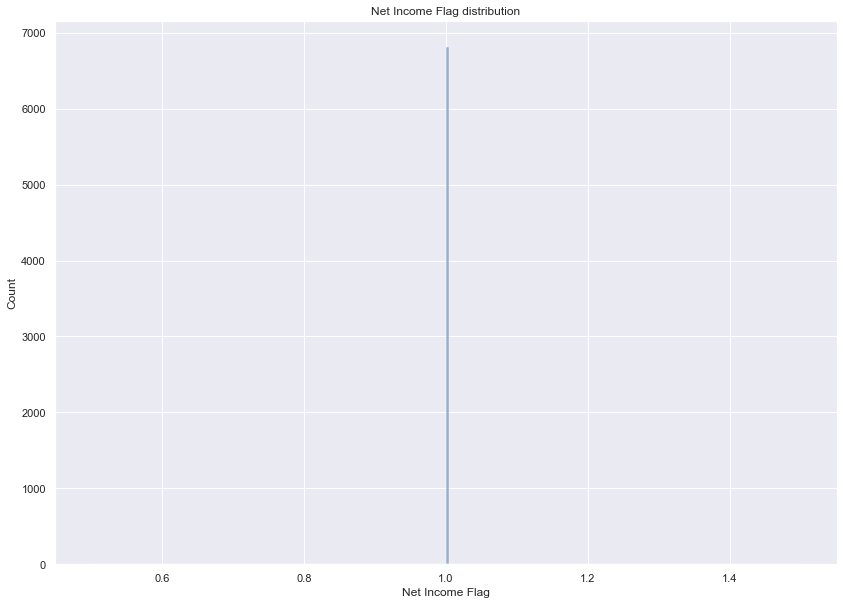

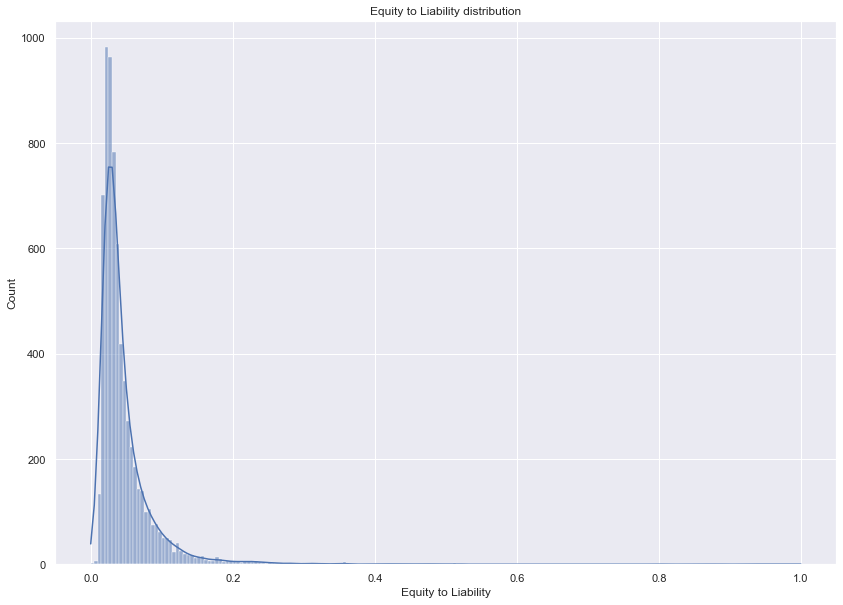

In [30]:
# plotting the distributions of the variables, with regards to the target variable
sns.set(rc={'figure.figsize':(14,10)})
plt.rcParams.update({'figure.max_open_warning': 0})

for i, col in enumerate(df.columns[1:]):
    plt.figure(i)
    plt.title(col+" distribution")
    sns.histplot(x=col, data=df, bins=200, kde=True)

### Distribution of independent variables

Previse ih, ne znam.

### 1.3. Outliers


### Experiment design

1. Exploration:
    - Target Distribution
    - Missing Values distribution
    - Outliers
2. Preprocessing:
    - Split Train/Test (70-30)
    - Clean missing values
    - Remove outliers
    - Scaling
    - Encoding
    - PCA
3. Models:
    - KNN
        - RandomizedSearchCV
        - Holdout
        - Cross-validation
    - RF
        - RandomizedSearchCV
        - Holdout
        - Cross-validation
    - MLP
        - RandomizedSearchCV
        - Holdout
        - Cross-validation
4. Metrics:
    - Accuracy
    - Precision
    - Sensitivity (for each class)
    - Specificity (for each class)
    - Recall
    - F1-Score

## 2. Preprocessing

### 2.1. Train/test split
We will do the split 70/30, but we will maintain the target variable balanced across the train and test split.

In [32]:
# split into train/test
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['Bankrupt?']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [34]:
strat_train_set.shape

(4773, 96)

In [36]:
strat_test_set.shape

(2046, 96)

In [47]:
strat_train_set['Bankrupt?'].sum()

154

In [46]:
strat_test_set['Bankrupt?'].sum()

66

In [49]:
X_train = strat_train_set.drop('Bankrupt?', axis=1)
y_train = strat_train_set['Bankrupt?']
X_test = strat_test_set.drop('Bankrupt?', axis=1)
y_test = strat_test_set['Bankrupt?']

### 2.2. Clean missing values
There are no missing values.

### 2.3. Remove outliers
We will see later on how to do this.

### 2.4. Scaling
We will try multiple scalers like StandardScaler, MinMaxScaler and RobustScaler.  
Standard Scaler scales the data according to the normal distribution with mean 0.  
MinMaxScaler scales the data in the range of 0,1 or -1,1 depending on the data.  
And RobustScaler removes the outliers by only choosing the data in the interquantile range.

### 2.5. Encoding
We do not have any variables that need encoding in this data set. We only have the target variable as true/false, but that is already in a binary format so we do not need to convert it to 1/0.

### 2.6. PCA
PCA will probably help the most in this case.

In [21]:
# try PCA later on

## 3. Model development

### 3.1. K-nearest neighbors

Model building:

    - standardscaler
    - minmax scaler
    - robust scaler
    - pca
    - no scaling
    
    - randomizedsearchCV
    - holdout
    - crossvalidation

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [53]:
cols = ["algorithm", "scaler", "accuracy", "precision", "recall", "f1"]
results = pd.DataFrame(columns = cols)

In [56]:
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    MLPClassifier(max_iter=500)
    ]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    None,
    PCA()
]
for classifier in classifiers:
    for scaler in scalers:
        steps = [
        ('scaler', scaler),
        ('clf', classifier)
    ]
    
        pipeline = Pipeline(steps)
        pipeline.fit(X_train, y_train)   
        y_pred = pipeline.predict(X_test)
        
        algorithm = classifier
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        new_row = pd.DataFrame({"algorithm": str(algorithm), "scaler": str(scaler), "accuracy": accuracy, "precision":precision, "recall":recall, "f1": f1}, index=[0])
                
        results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, 

In [57]:
results

,algorithm,scaler,accuracy,precision,recall,f1
0,MLPClassifier(max_iter=500),PCA(),0.940860,0.076923,0.075758,0.076336
1,MLPClassifier(max_iter=500),None,0.956012,0.100000,0.045455,0.062500
2,MLPClassifier(max_iter=500),RobustScaler(),0.818671,0.079890,0.439394,0.135198
3,MLPClassifier(max_iter=500),MinMaxScaler(),0.969208,0.578947,0.166667,0.258824
4,MLPClassifier(max_iter=500),StandardScaler(),0.962854,0.395833,0.287879,0.333333
5,RandomForestClassifier(),PCA(),0.969208,0.714286,0.075758,0.136986
6,RandomForestClassifier(),None,0.970186,0.600000,0.227273,0.329670
7,RandomForestClassifier(),RobustScaler(),0.970186,0.608696,0.212121,0.314607
8,RandomForestClassifier(),MinMaxScaler(),0.969208,0.571429,0.181818,0.275862
9,RandomForestClassifier(),StandardScaler(),0.970186,0.619048,0.196970,0.298851


left to-do:

- randomizedsearchcv
- cv
- holdout
- implement sensitivity and specificity

## 4. Results